In [21]:
import pandas as pd
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [22]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./sensordata/**/*rawdata.features.csv')):
    print(csv_filename)
    _dfs_list.append(pd.read_csv(csv_filename)) # Adjust the chunk size
df = pd.concat(_dfs_list)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

./sensordata\csh101\csh101.rawdata.features.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.59s/it]


In [23]:
df.describe()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea
count,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,1.875227e+06,...,1.875227e+06,1875227.0,1.875227e+06,1875227.0,1.875227e+06,1.875227e+06,1.875227e+06,1875227.0,1.875227e+06,1875227.0
mean,1.255876e+01,4.702725e+04,3.040704e+00,4.956563e+02,1.709192e+01,4.210329e+00,4.210233e+00,4.449672e+00,4.449672e+00,4.195637e+00,...,3.901919e+03,86400.0,5.711006e+03,86400.0,7.184985e+01,4.234775e+03,1.714030e+03,86400.0,4.403120e+03,86400.0
std,5.593744e+00,2.022746e+04,2.026046e+00,1.373311e+03,1.238606e+02,2.802907e+00,2.802948e+00,2.569820e+00,2.569820e+00,3.165564e+00,...,6.725751e+03,0.0,9.267399e+03,0.0,4.512112e+02,7.117648e+03,6.417951e+03,0.0,7.178098e+03,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,0.000000e+00,86400.0,0.000000e+00,86400.0,0.000000e+00,0.000000e+00,0.000000e+00,86400.0,0.000000e+00,86400.0
25%,9.000000e+00,3.448300e+04,1.000000e+00,4.700000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,5.448592e+01,86400.0,3.283941e+02,86400.0,0.000000e+00,4.340690e+01,1.318855e+00,86400.0,3.074900e+02,86400.0
50%,1.200000e+01,4.449200e+04,3.000000e+00,8.900000e+01,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,...,1.047493e+03,86400.0,2.032919e+03,86400.0,6.032670e-01,1.539565e+03,1.320399e+02,86400.0,1.696094e+03,86400.0
75%,1.600000e+01,6.065000e+04,5.000000e+00,4.160000e+02,4.000000e+00,7.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,...,5.387864e+03,86400.0,6.916898e+03,86400.0,1.368607e+01,5.239744e+03,6.191516e+02,86400.0,5.627260e+03,86400.0
max,2.300000e+01,8.639900e+04,6.000000e+00,7.751300e+04,6.762600e+04,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,...,8.640000e+04,86400.0,8.640000e+04,86400.0,8.640000e+04,8.640000e+04,8.640000e+04,86400.0,8.640000e+04,86400.0


In [35]:
df['activity'] = df['activity'].replace('?', pd.NA)

In [36]:
for feature in df.columns:
    print("featurename-",feature, "-datatype-",df[feature].dtypes,"-length -",len(df[feature].unique()))

featurename- lastSensorEventHours -datatype- float64 -length - 24
featurename- lastSensorEventSeconds -datatype- float64 -length - 85048
featurename- lastSensorDayOfWeek -datatype- float64 -length - 7
featurename- windowDuration -datatype- float64 -length - 971
featurename- timeSinceLastSensorEvent -datatype- float64 -length - 11
featurename- prevDominantSensor1 -datatype- float64 -length - 7
featurename- prevDominantSensor2 -datatype- float64 -length - 7
featurename- lastSensorID -datatype- float64 -length - 7
featurename- lastSensorLocation -datatype- float64 -length - 7
featurename- lastMotionLocation -datatype- float64 -length - 7
featurename- complexity -datatype- float64 -length - 860
featurename- activityChange -datatype- float64 -length - 293328
featurename- areaTransitions -datatype- float64 -length - 23
featurename- numDistinctSensors -datatype- float64 -length - 1
featurename- sensorCount-Bathroom -datatype- float64 -length - 1
featurename- sensorCount-Bedroom -datatype- flo

In [37]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 36
Discrete feature Count 21
Continuous feature Count 15
Categorical feature Count 1


In [26]:
print("Numerical features:",numerical_feature)
print("discrete_features:",discrete_feature)
print("continuous_features:",continuous_feature)
print("categorical_features:",categorical_feature)
 

Numerical features: ['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek', 'windowDuration', 'timeSinceLastSensorEvent', 'prevDominantSensor1', 'prevDominantSensor2', 'lastSensorID', 'lastSensorLocation', 'lastMotionLocation', 'complexity', 'activityChange', 'areaTransitions', 'numDistinctSensors', 'sensorCount-Bathroom', 'sensorCount-Bedroom', 'sensorCount-Chair', 'sensorCount-DiningRoom', 'sensorCount-Hall', 'sensorCount-Ignore', 'sensorCount-Kitchen', 'sensorCount-LivingRoom', 'sensorCount-Office', 'sensorCount-OutsideDoor', 'sensorCount-WorkArea', 'sensorElTime-Bathroom', 'sensorElTime-Bedroom', 'sensorElTime-Chair', 'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore', 'sensorElTime-Kitchen', 'sensorElTime-LivingRoom', 'sensorElTime-Office', 'sensorElTime-OutsideDoor', 'sensorElTime-WorkArea']
discrete_features: ['lastSensorEventHours', 'lastSensorDayOfWeek', 'prevDominantSensor1', 'prevDominantSensor2', 'lastSensorID', 'lastSensorLocation', 'la

In [38]:
#check for null values
df.isnull().sum()*100/len(df)

lastSensorEventHours          0.0
lastSensorEventSeconds        0.0
lastSensorDayOfWeek           0.0
windowDuration                0.0
timeSinceLastSensorEvent      0.0
prevDominantSensor1           0.0
prevDominantSensor2           0.0
lastSensorID                  0.0
lastSensorLocation            0.0
lastMotionLocation            0.0
complexity                    0.0
activityChange                0.0
areaTransitions               0.0
numDistinctSensors            0.0
sensorCount-Bathroom          0.0
sensorCount-Bedroom           0.0
sensorCount-Chair             0.0
sensorCount-DiningRoom        0.0
sensorCount-Hall              0.0
sensorCount-Ignore            0.0
sensorCount-Kitchen           0.0
sensorCount-LivingRoom        0.0
sensorCount-Office            0.0
sensorCount-OutsideDoor       0.0
sensorCount-WorkArea          0.0
sensorElTime-Bathroom         0.0
sensorElTime-Bedroom          0.0
sensorElTime-Chair            0.0
sensorElTime-DiningRoom       0.0
sensorElTime-H

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-p

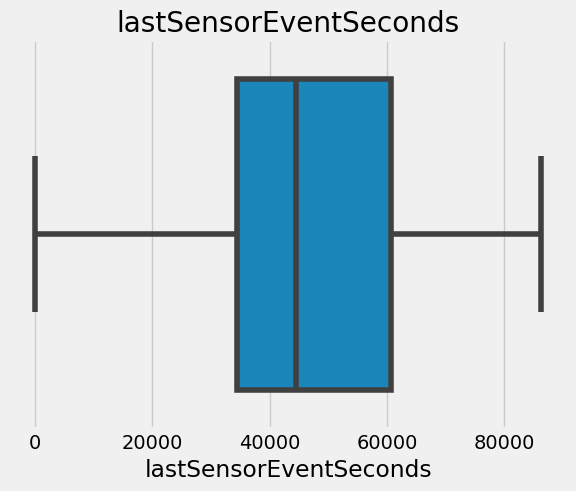

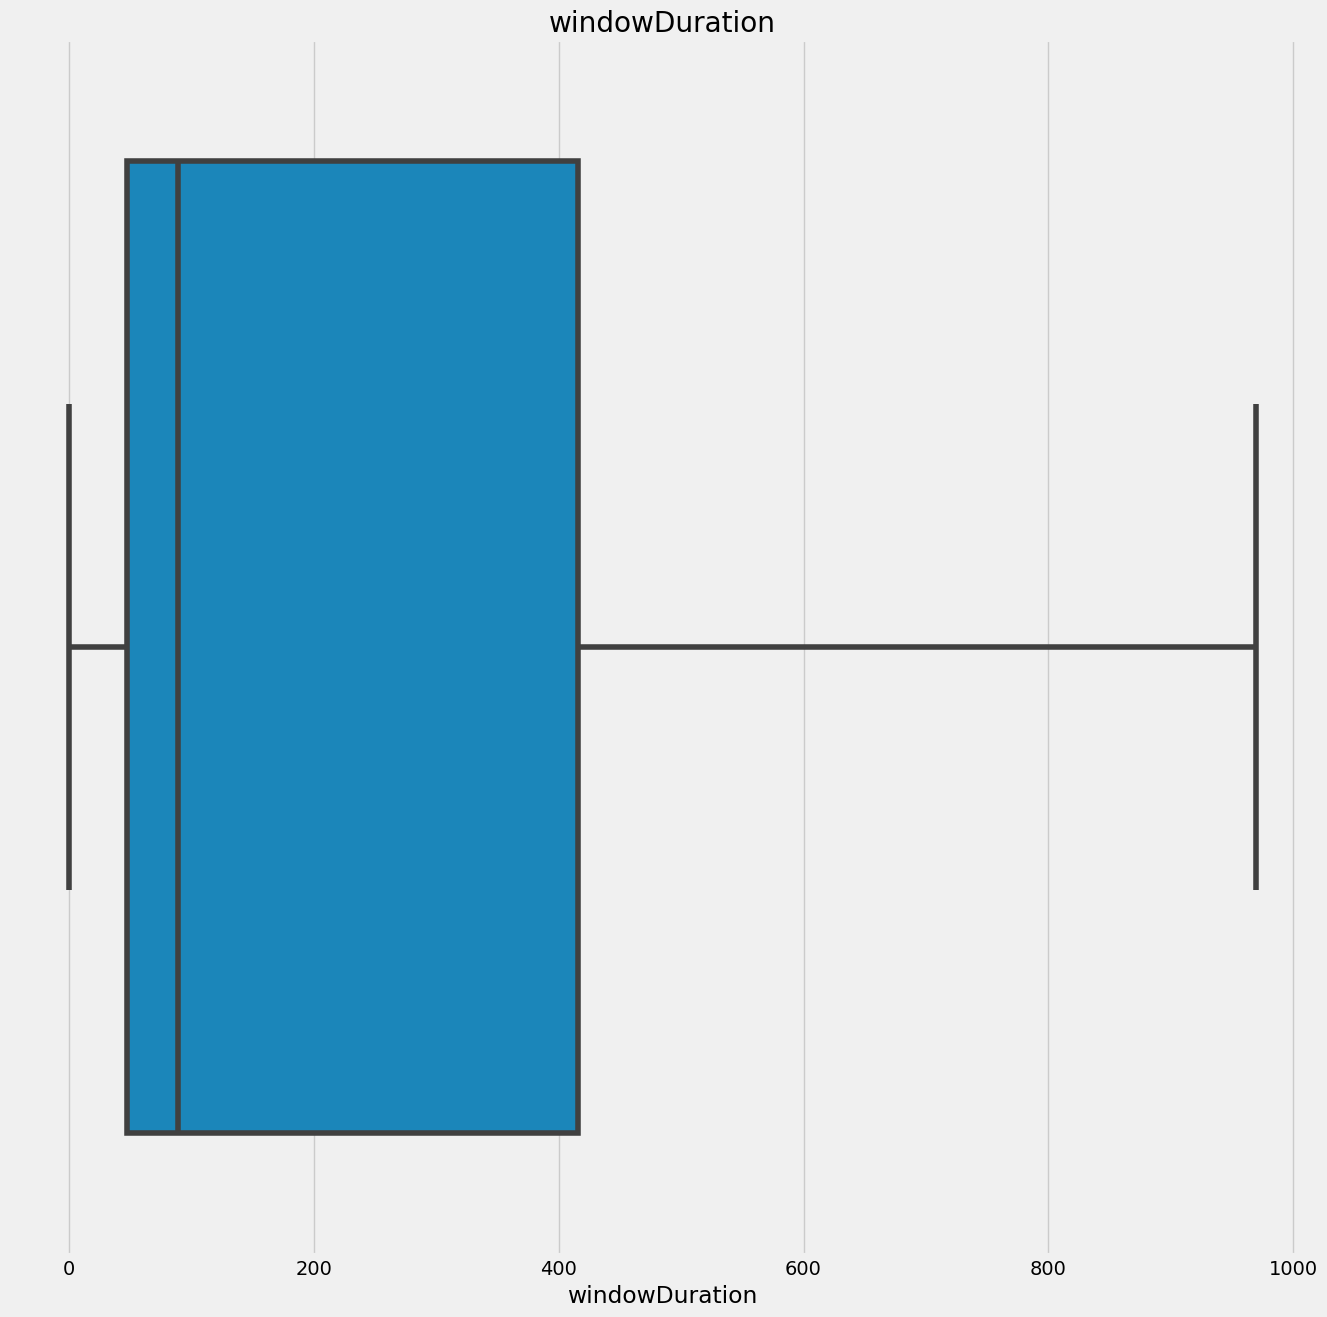

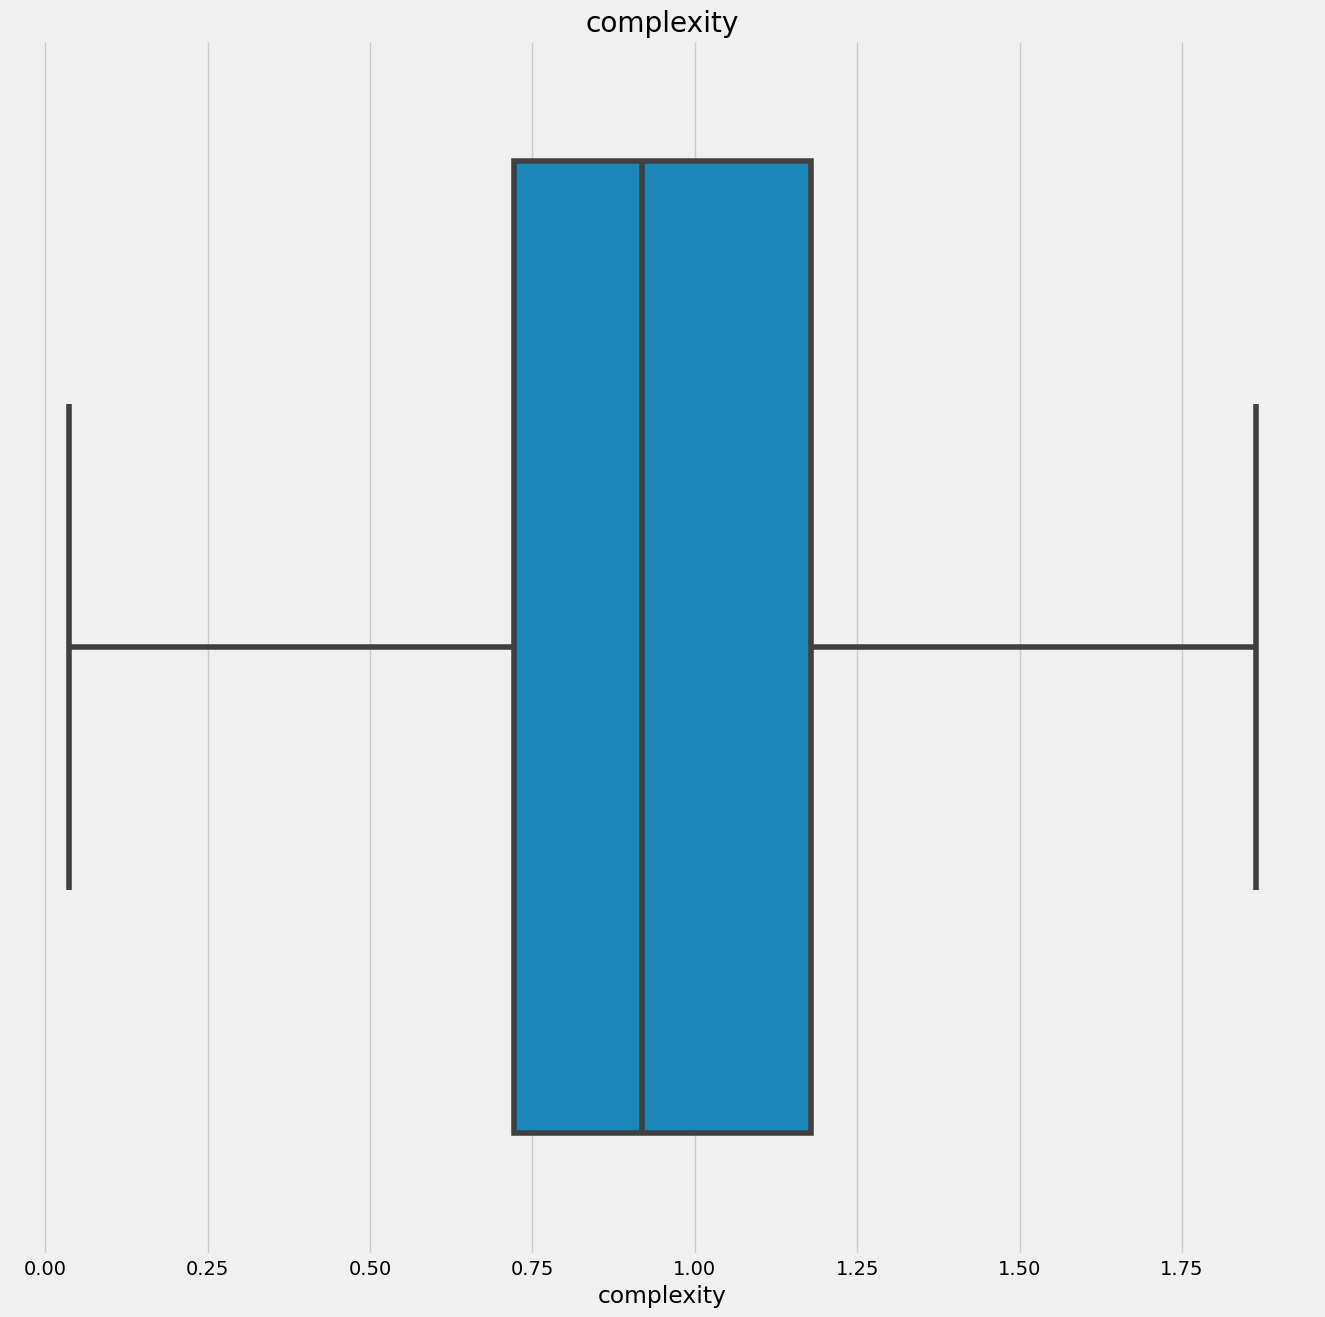

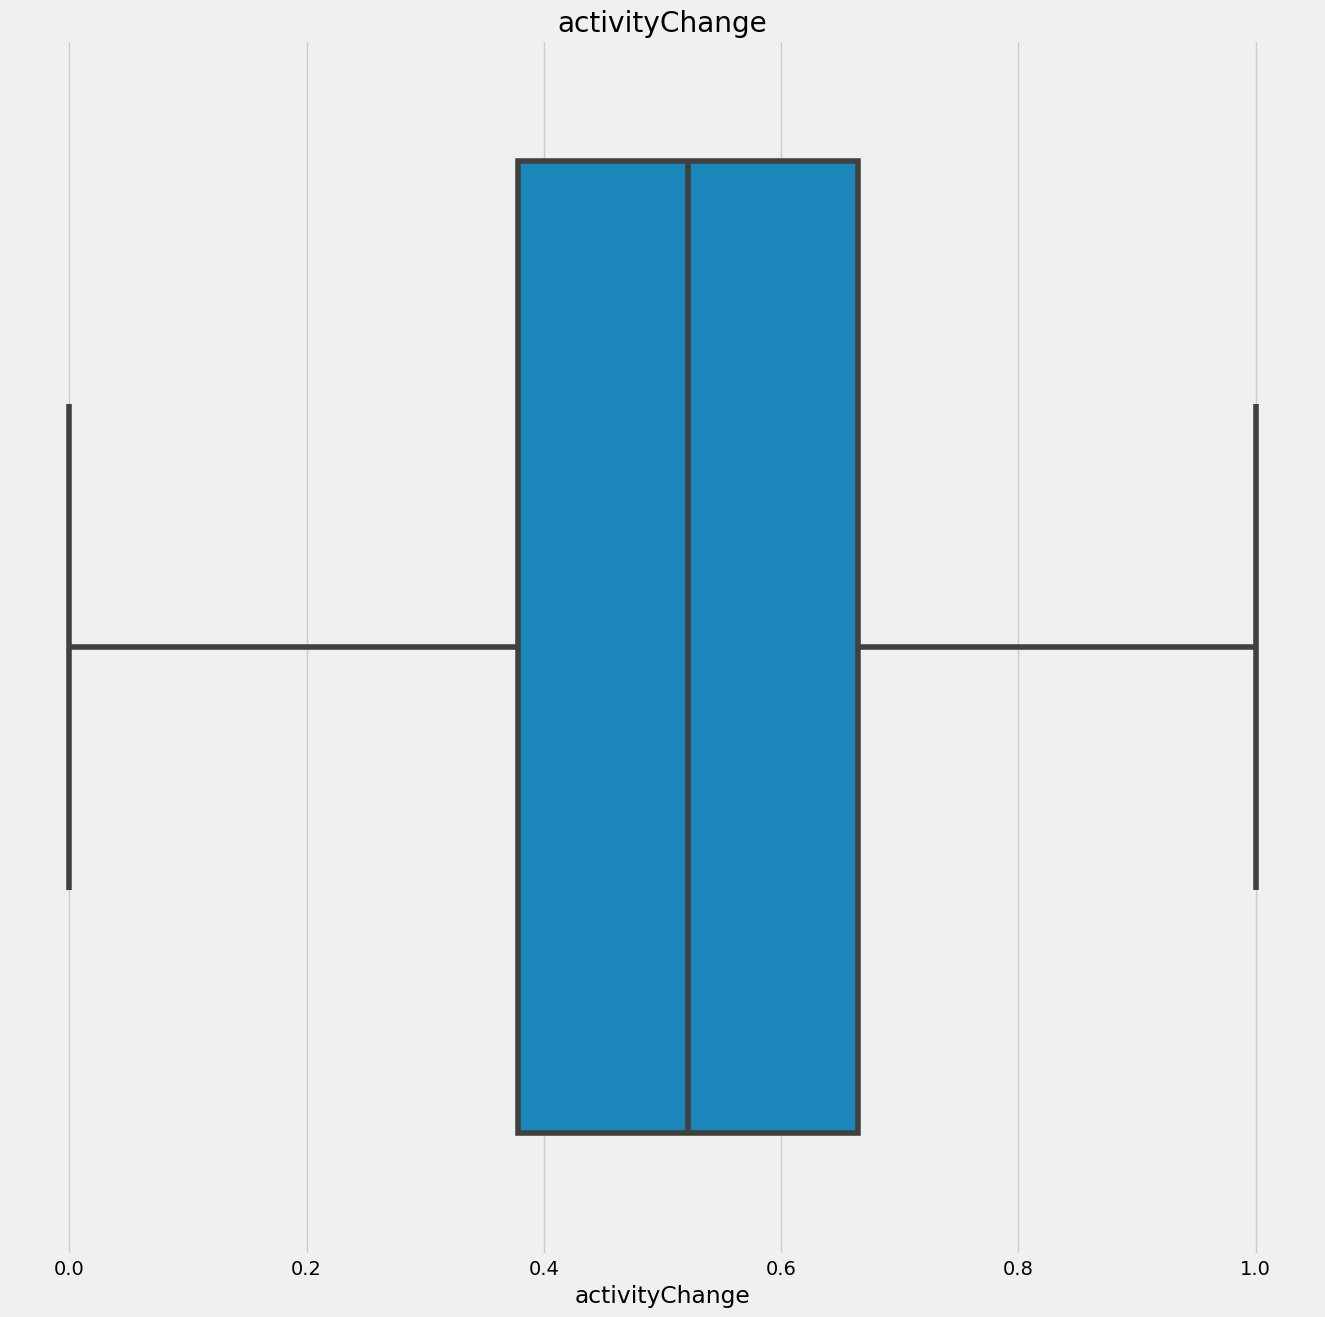

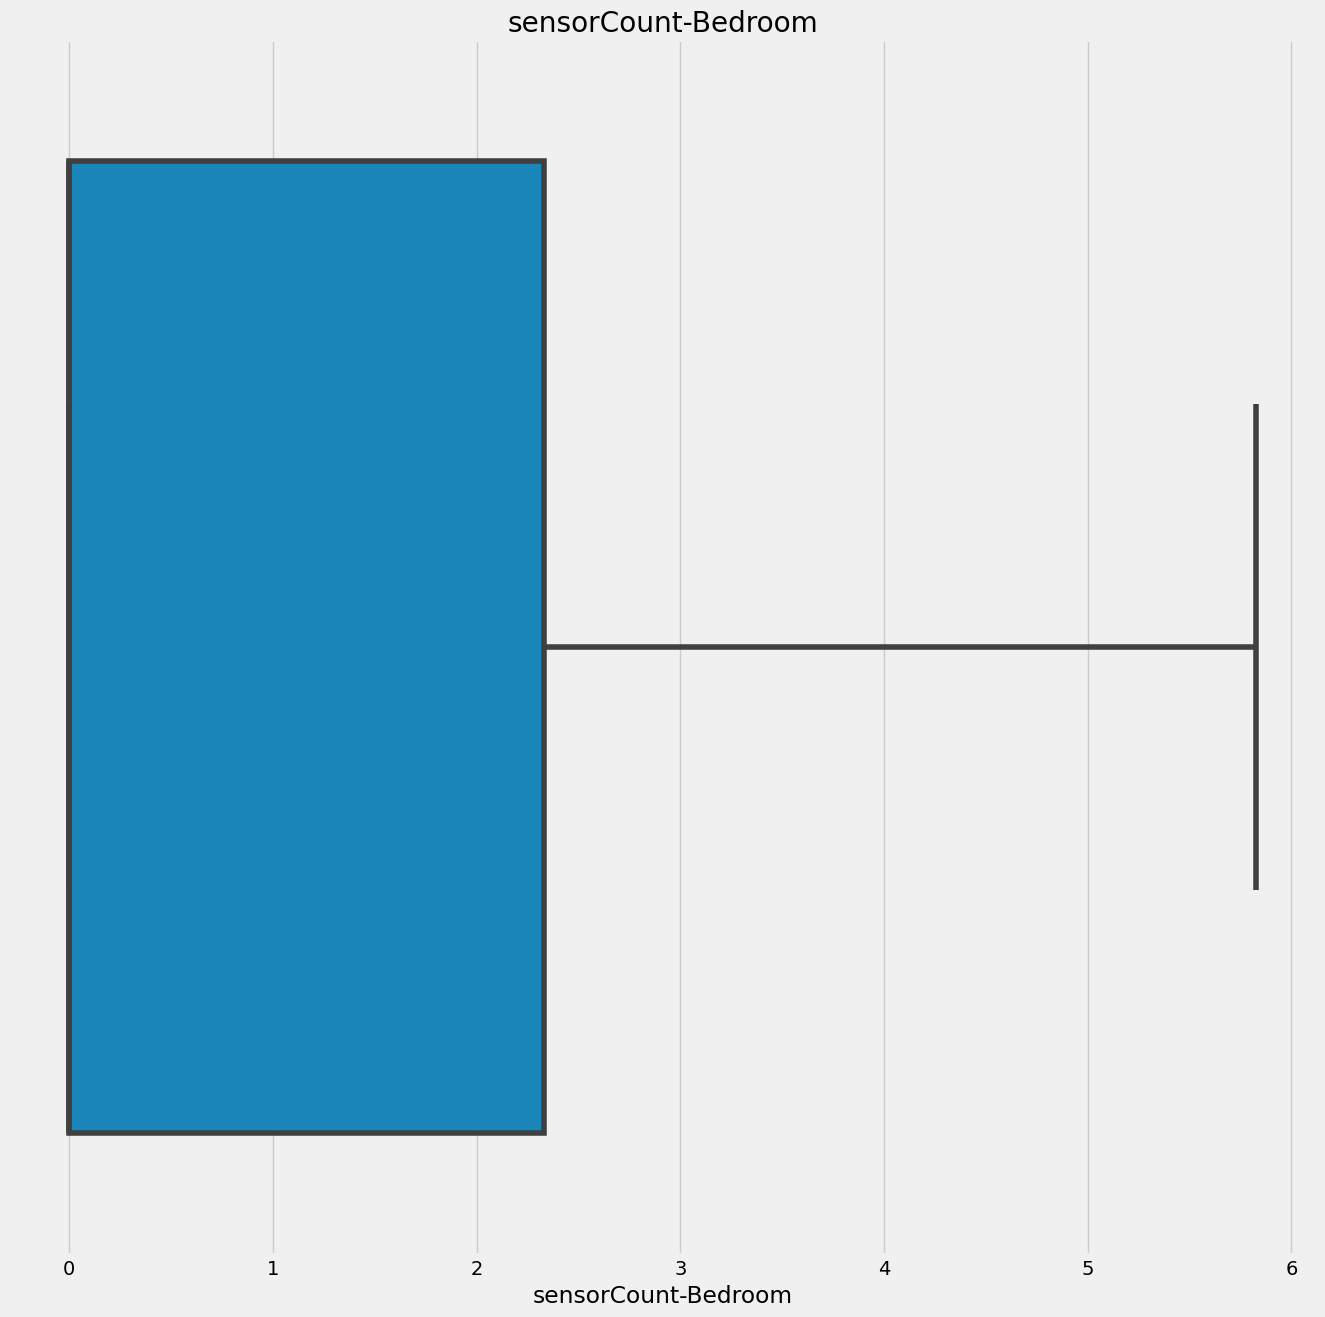

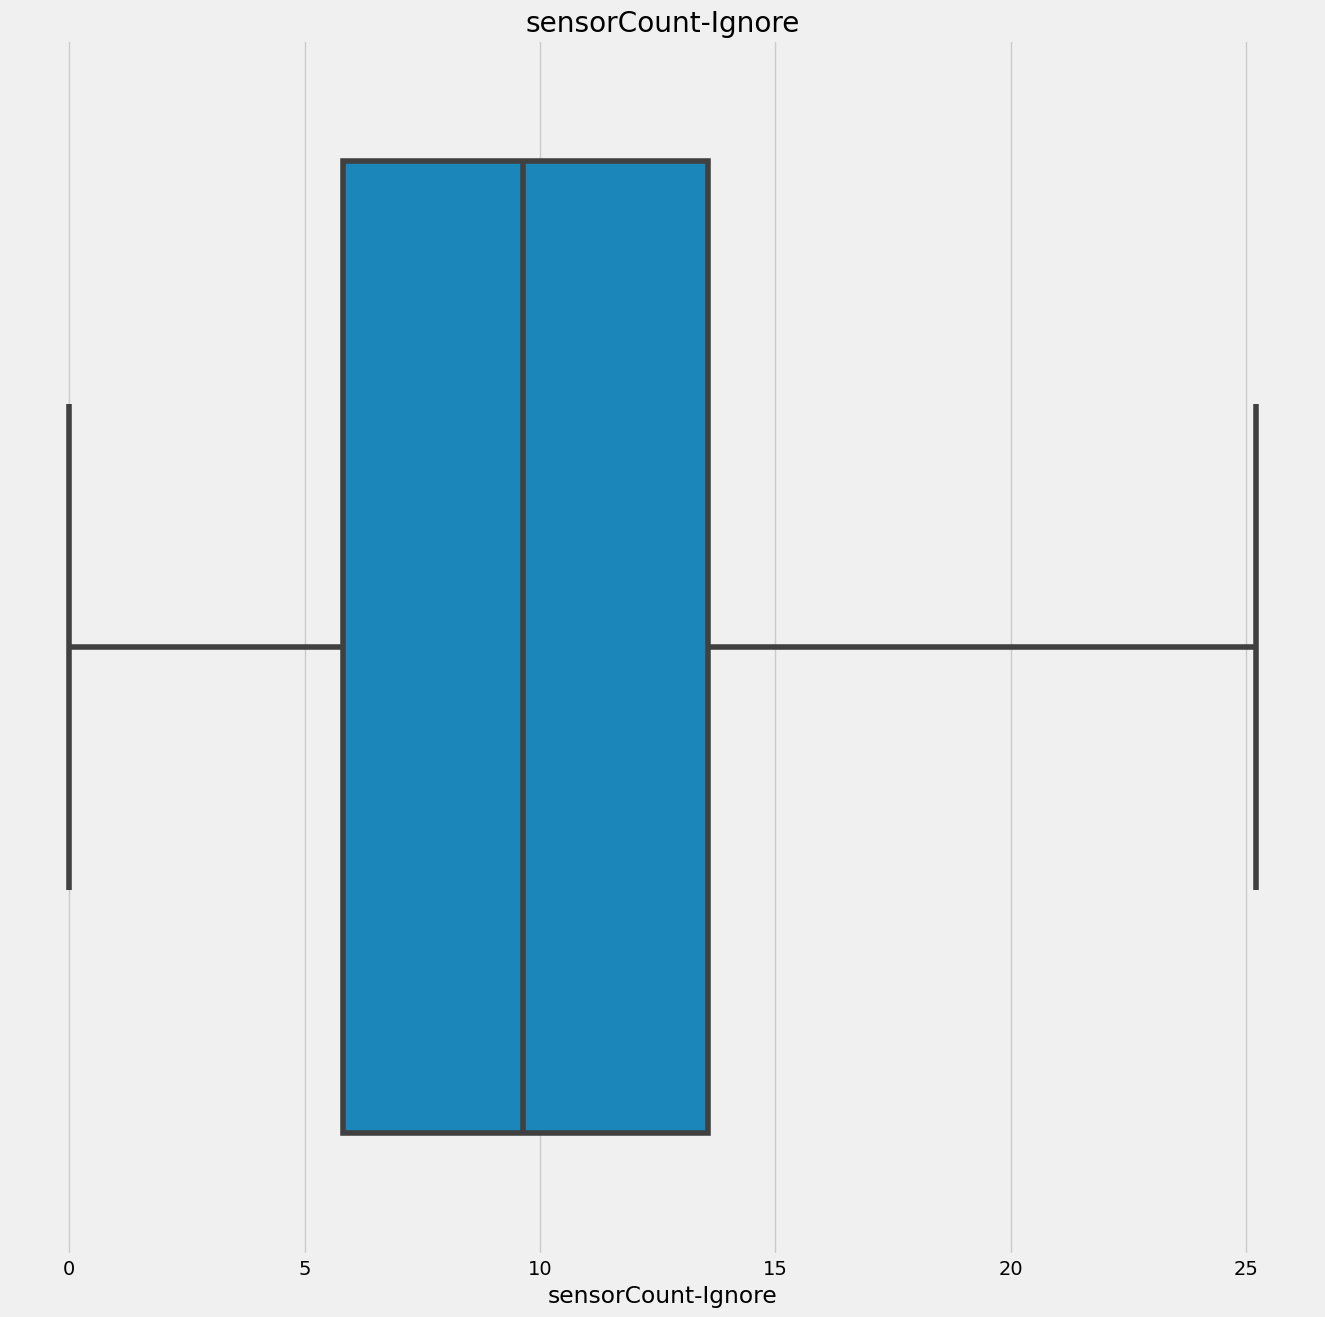

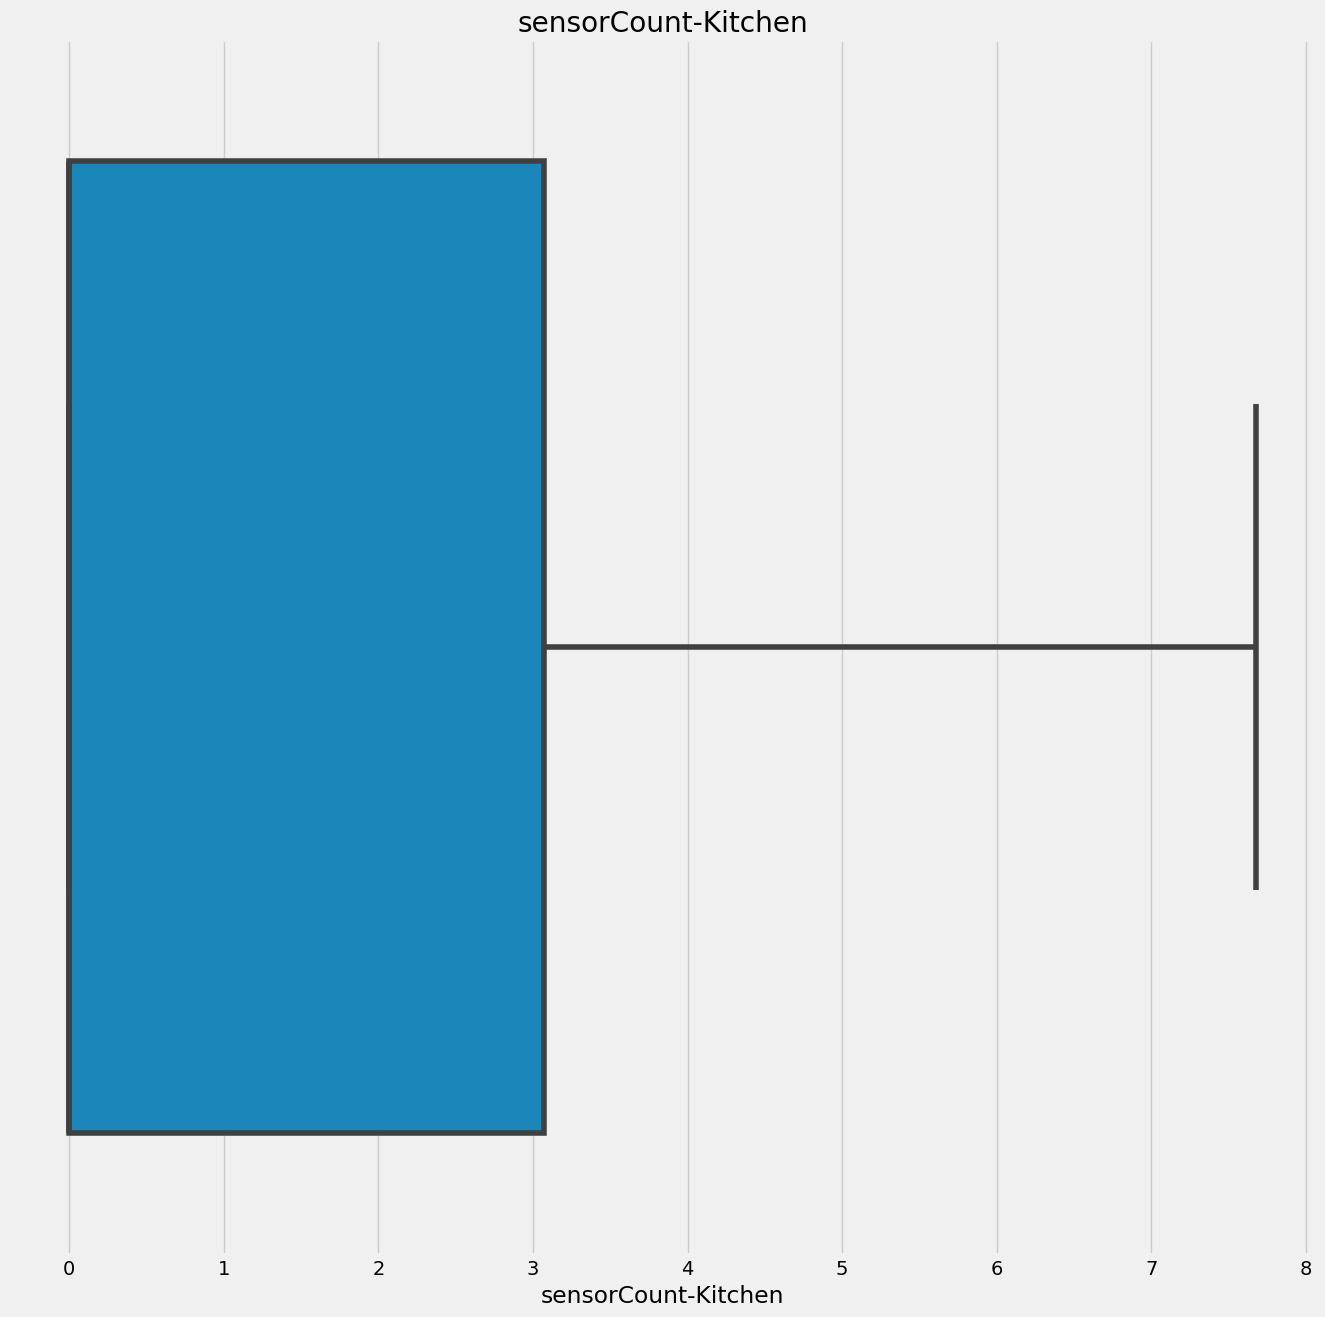

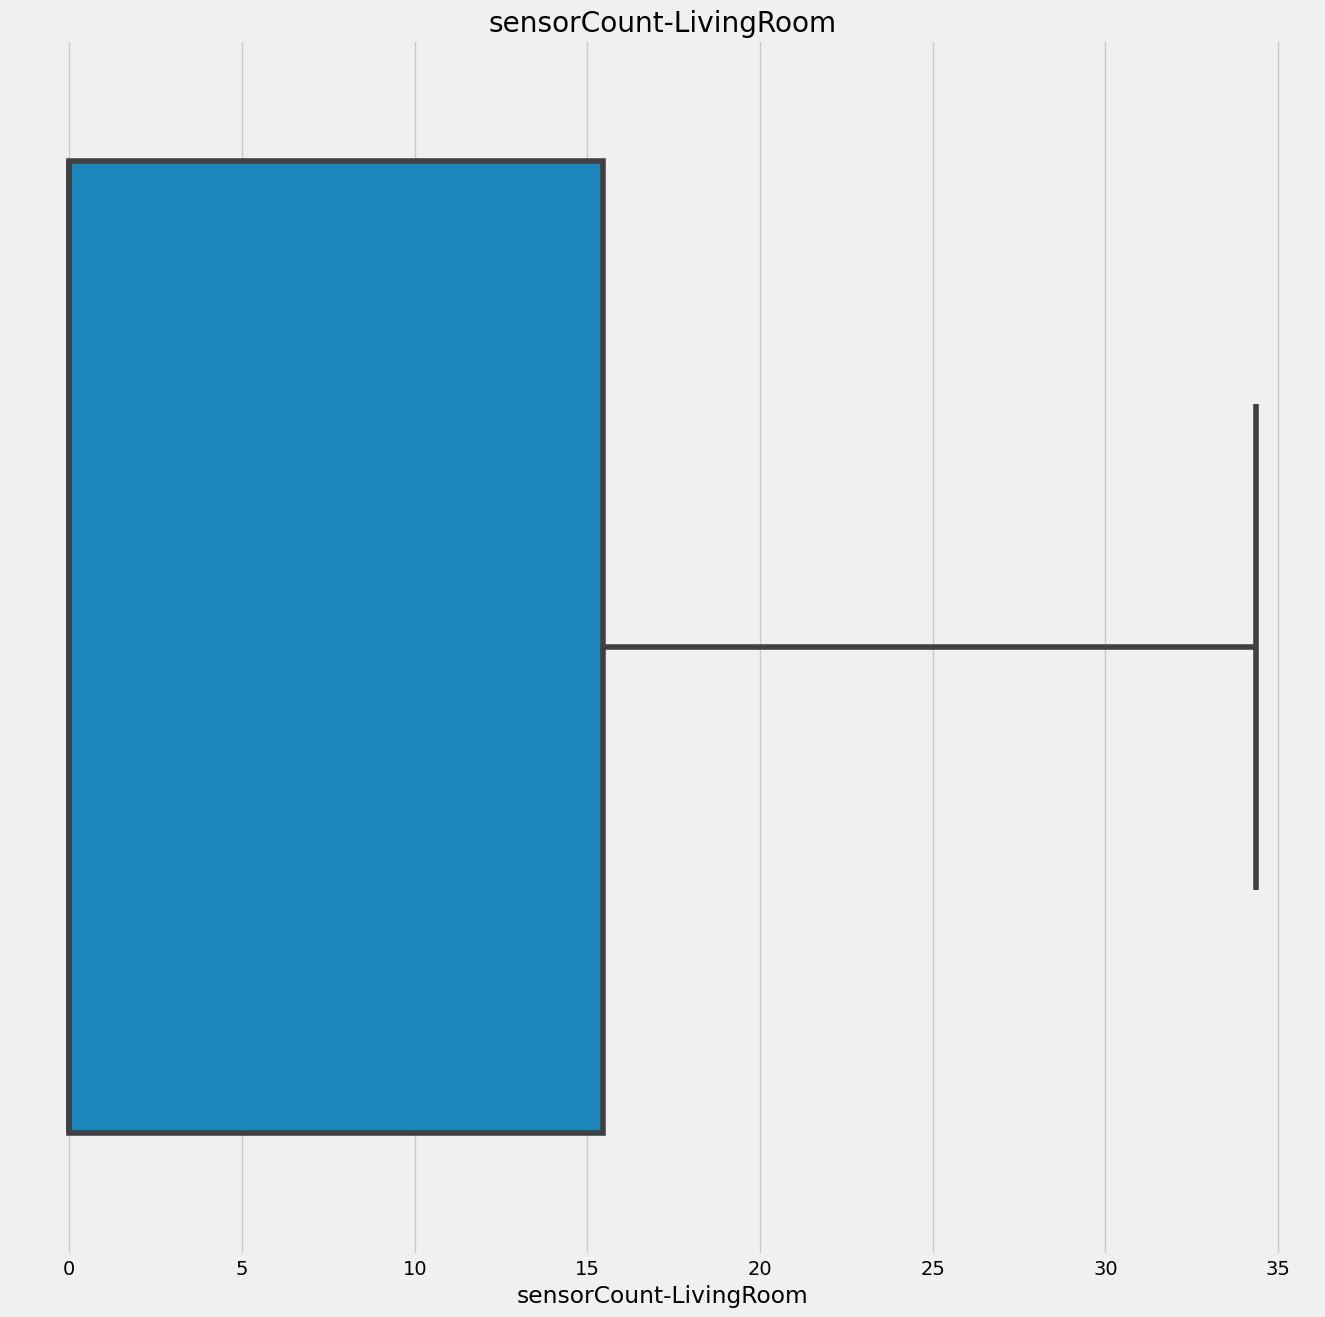

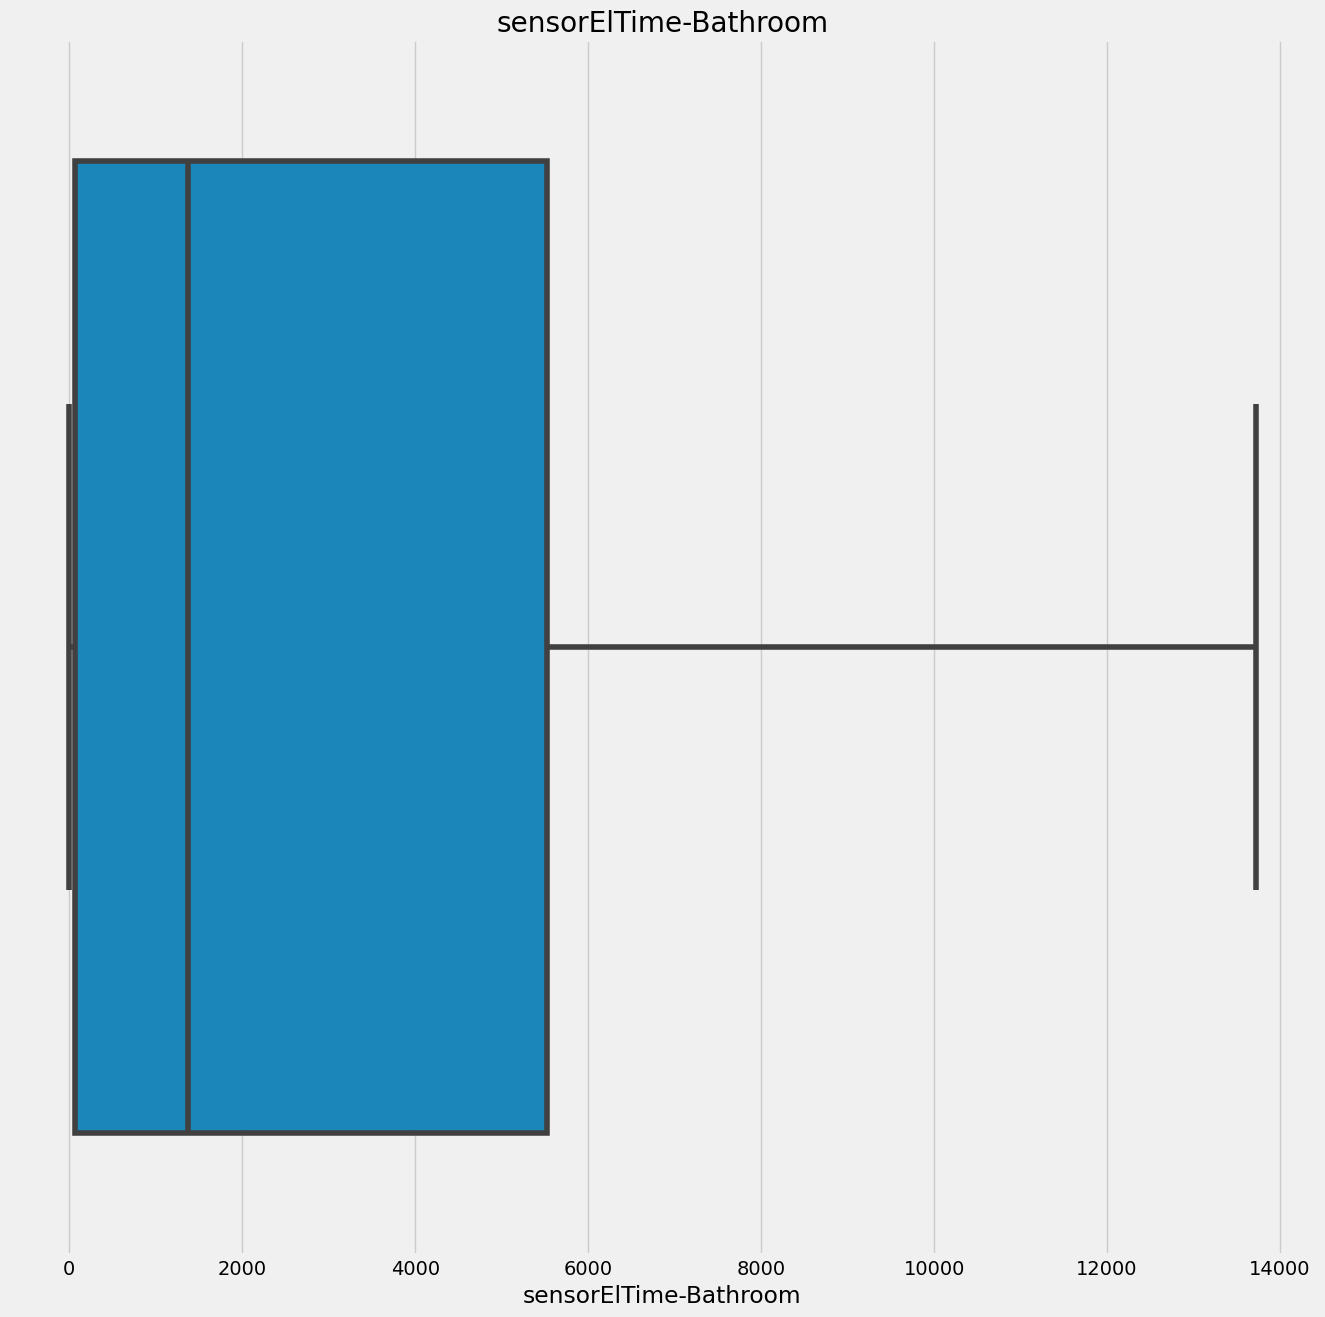

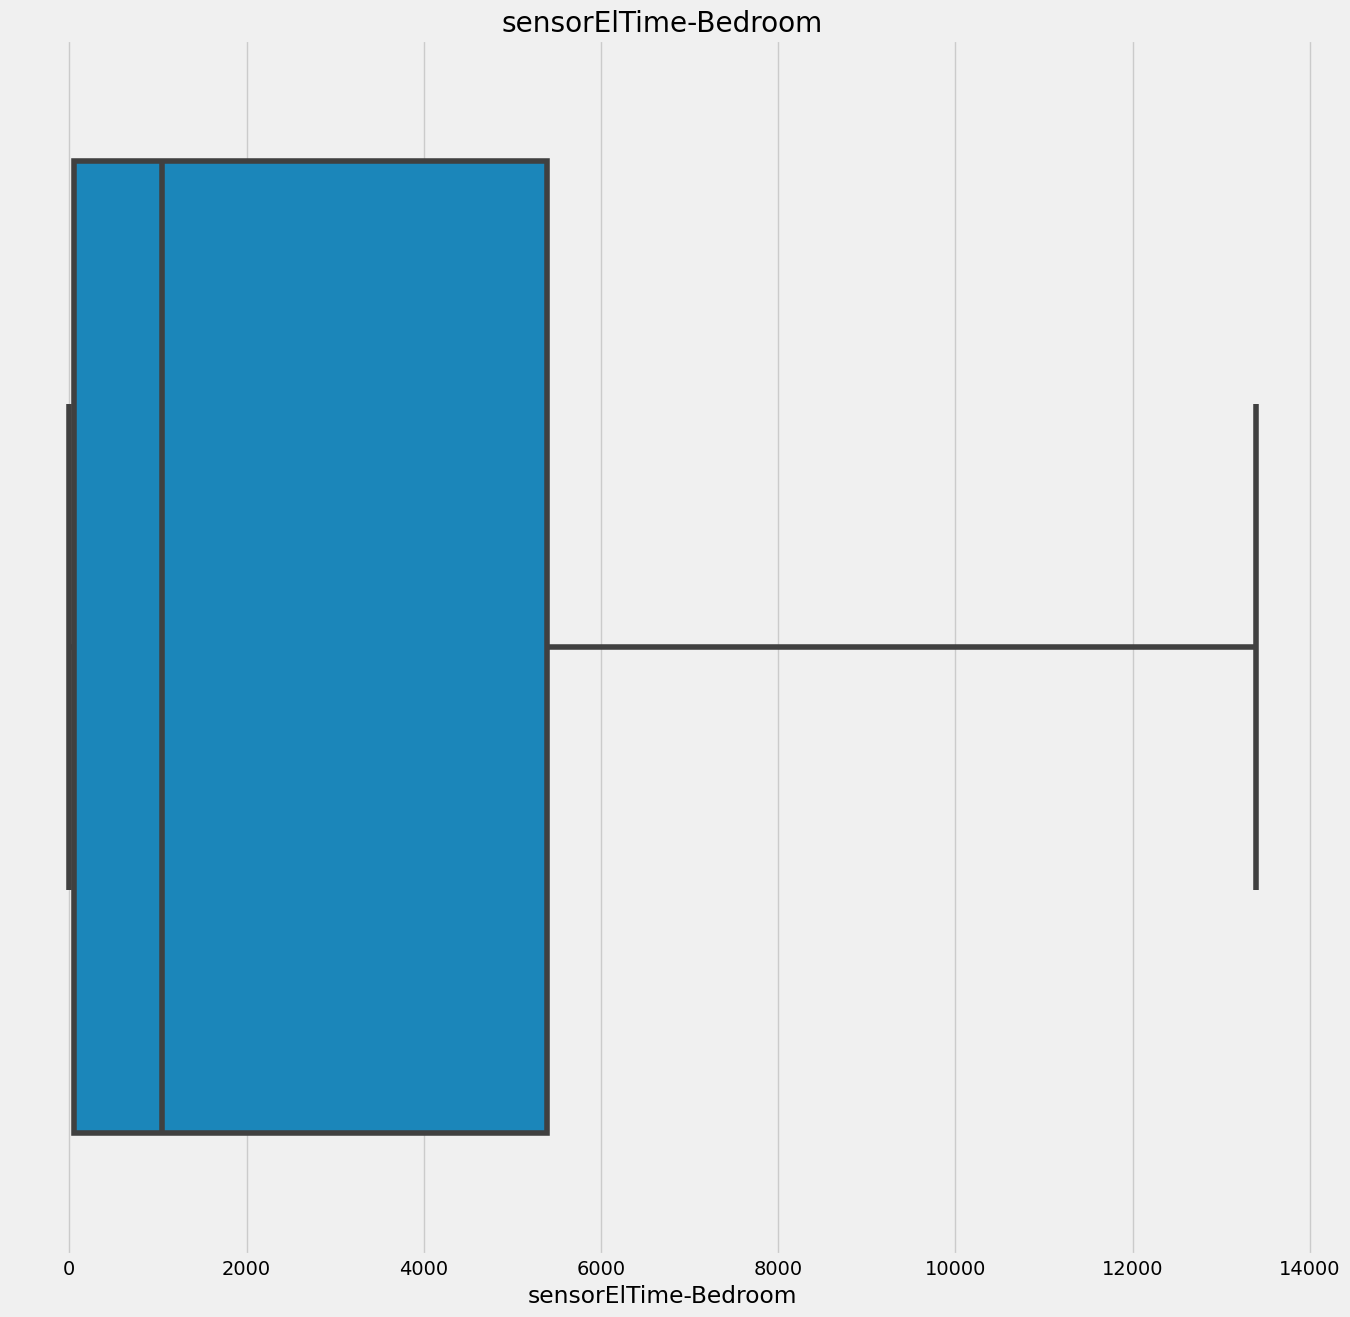

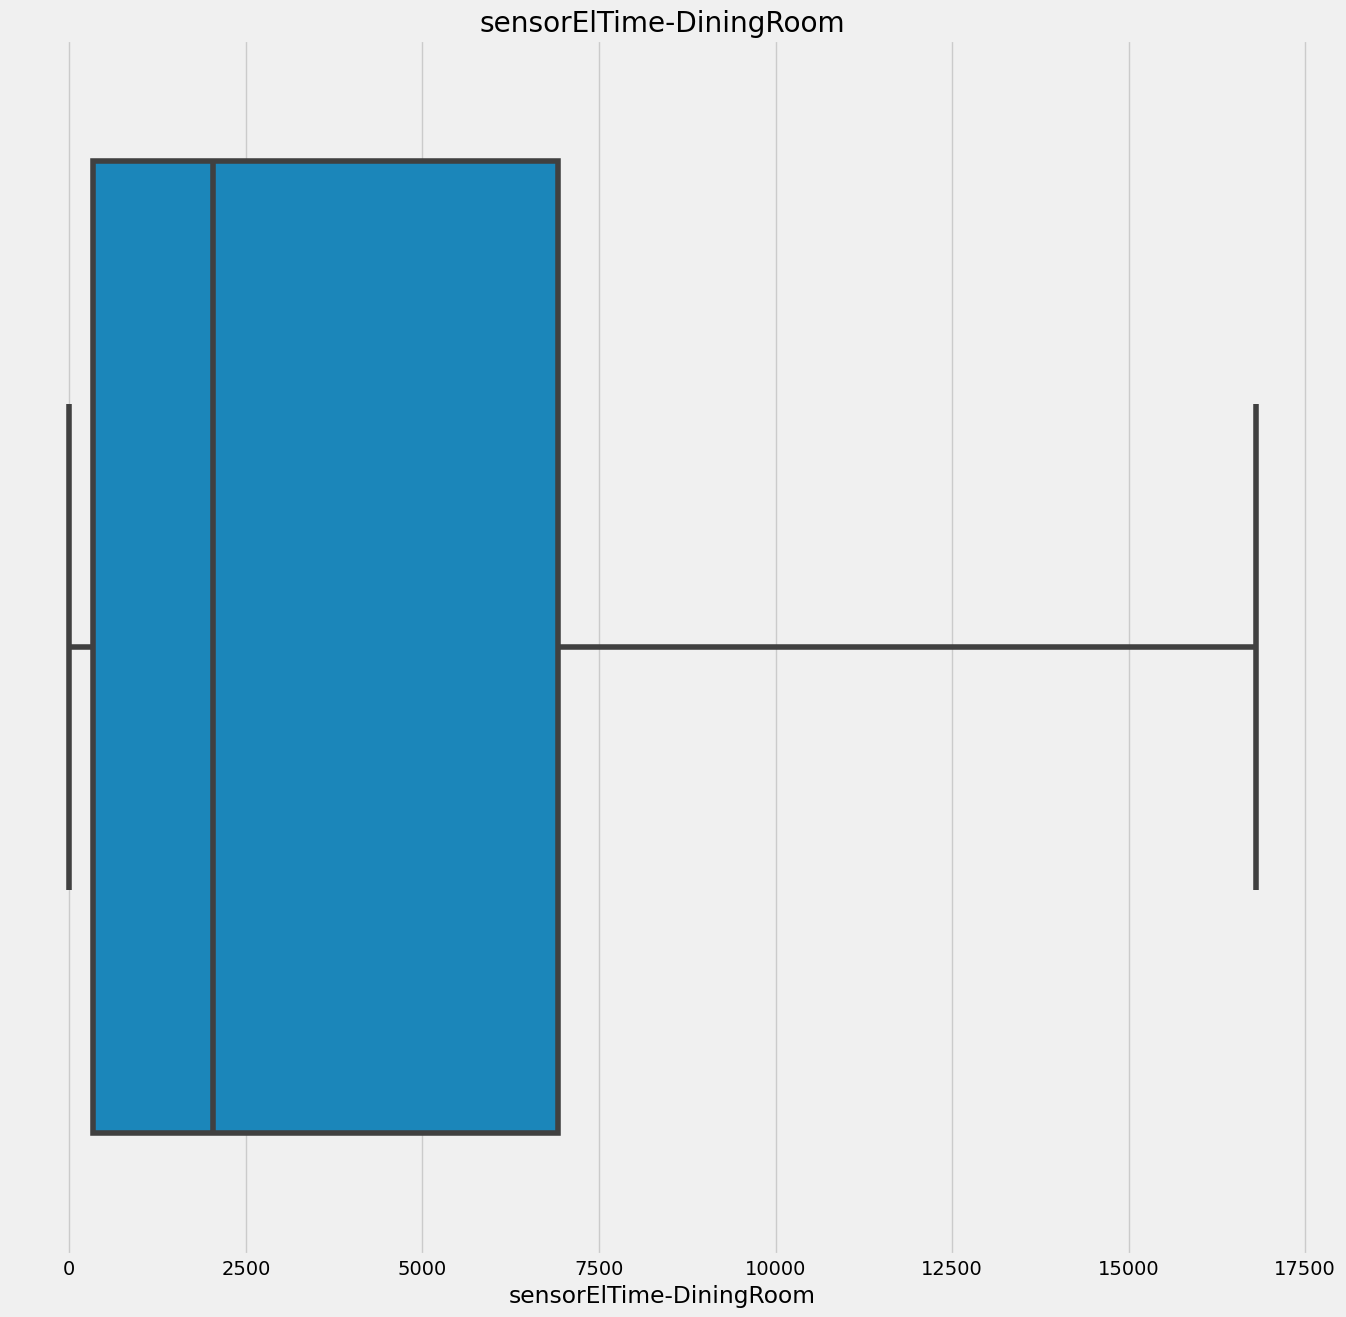

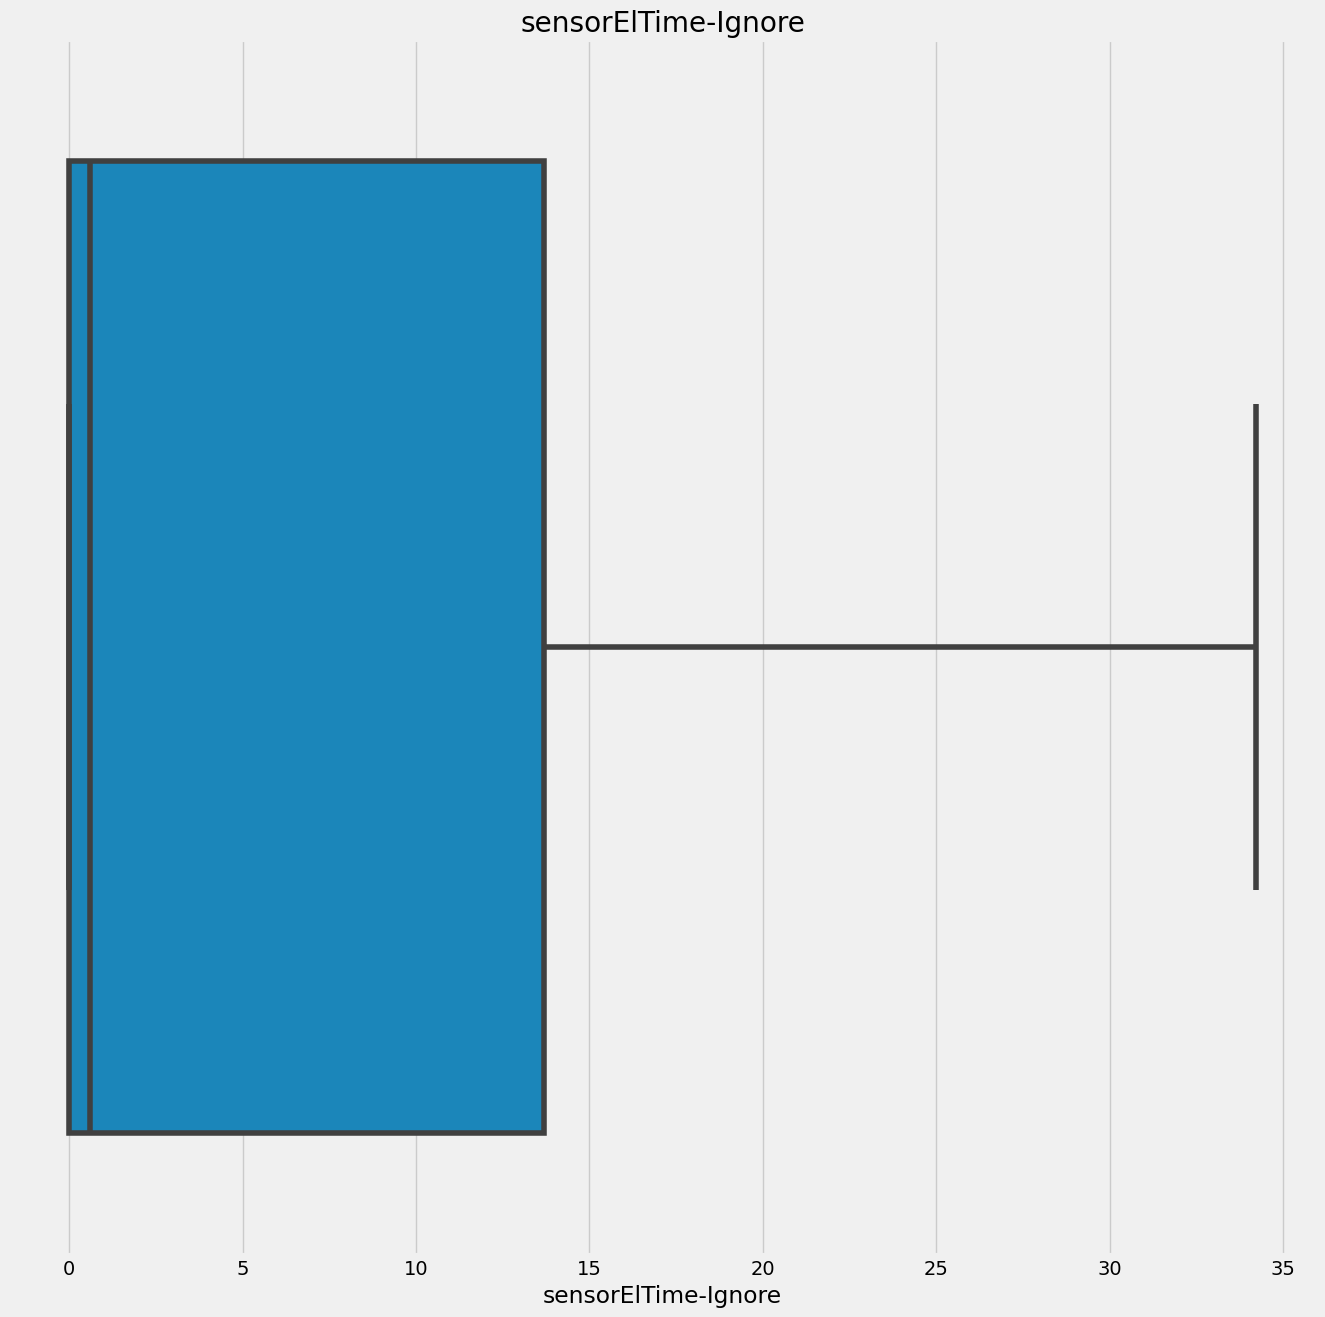

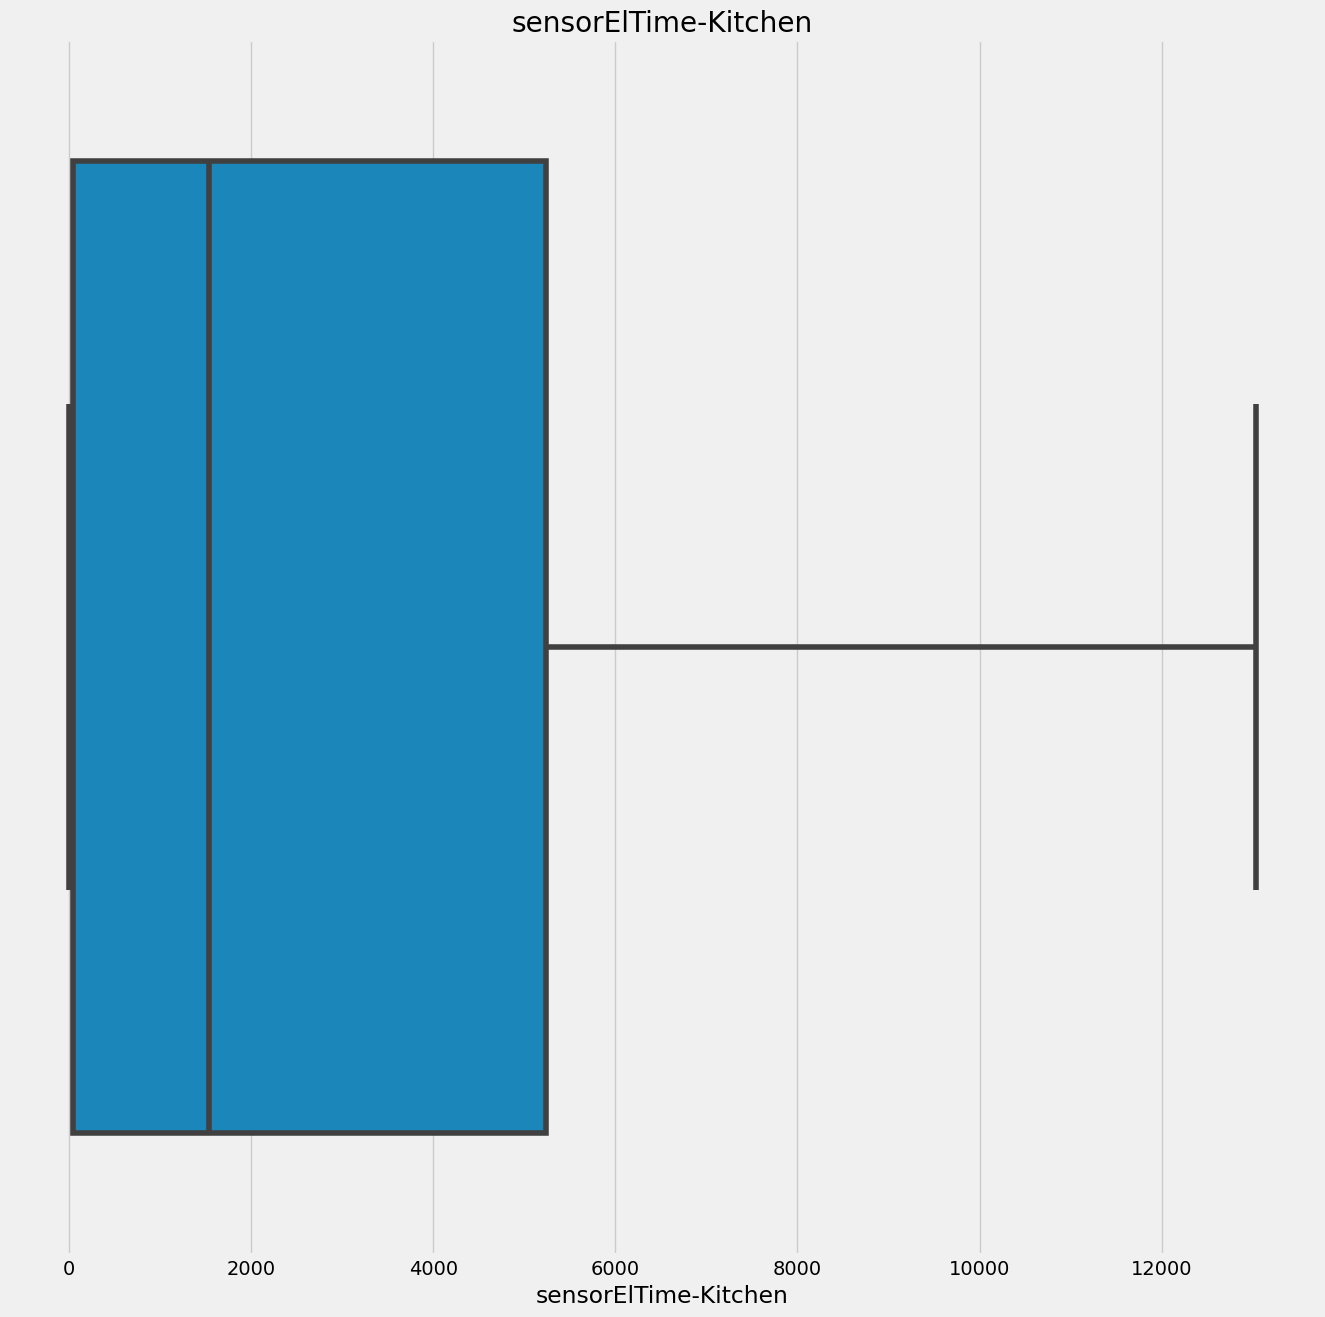

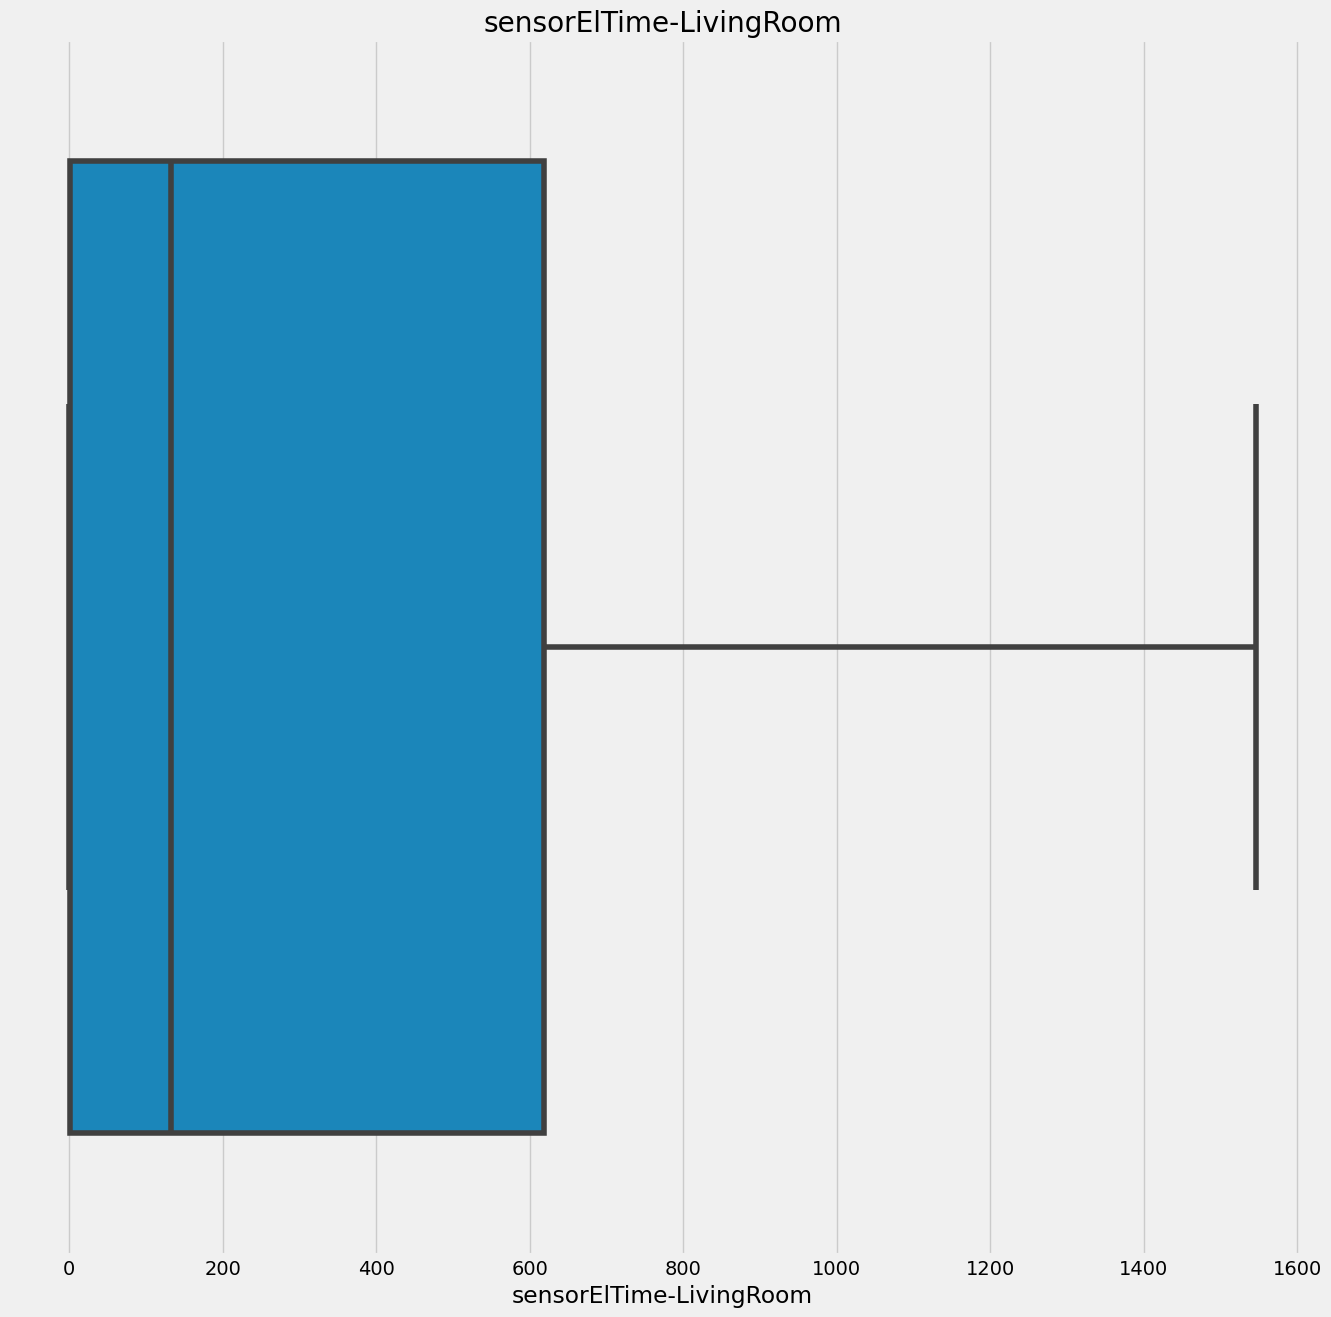

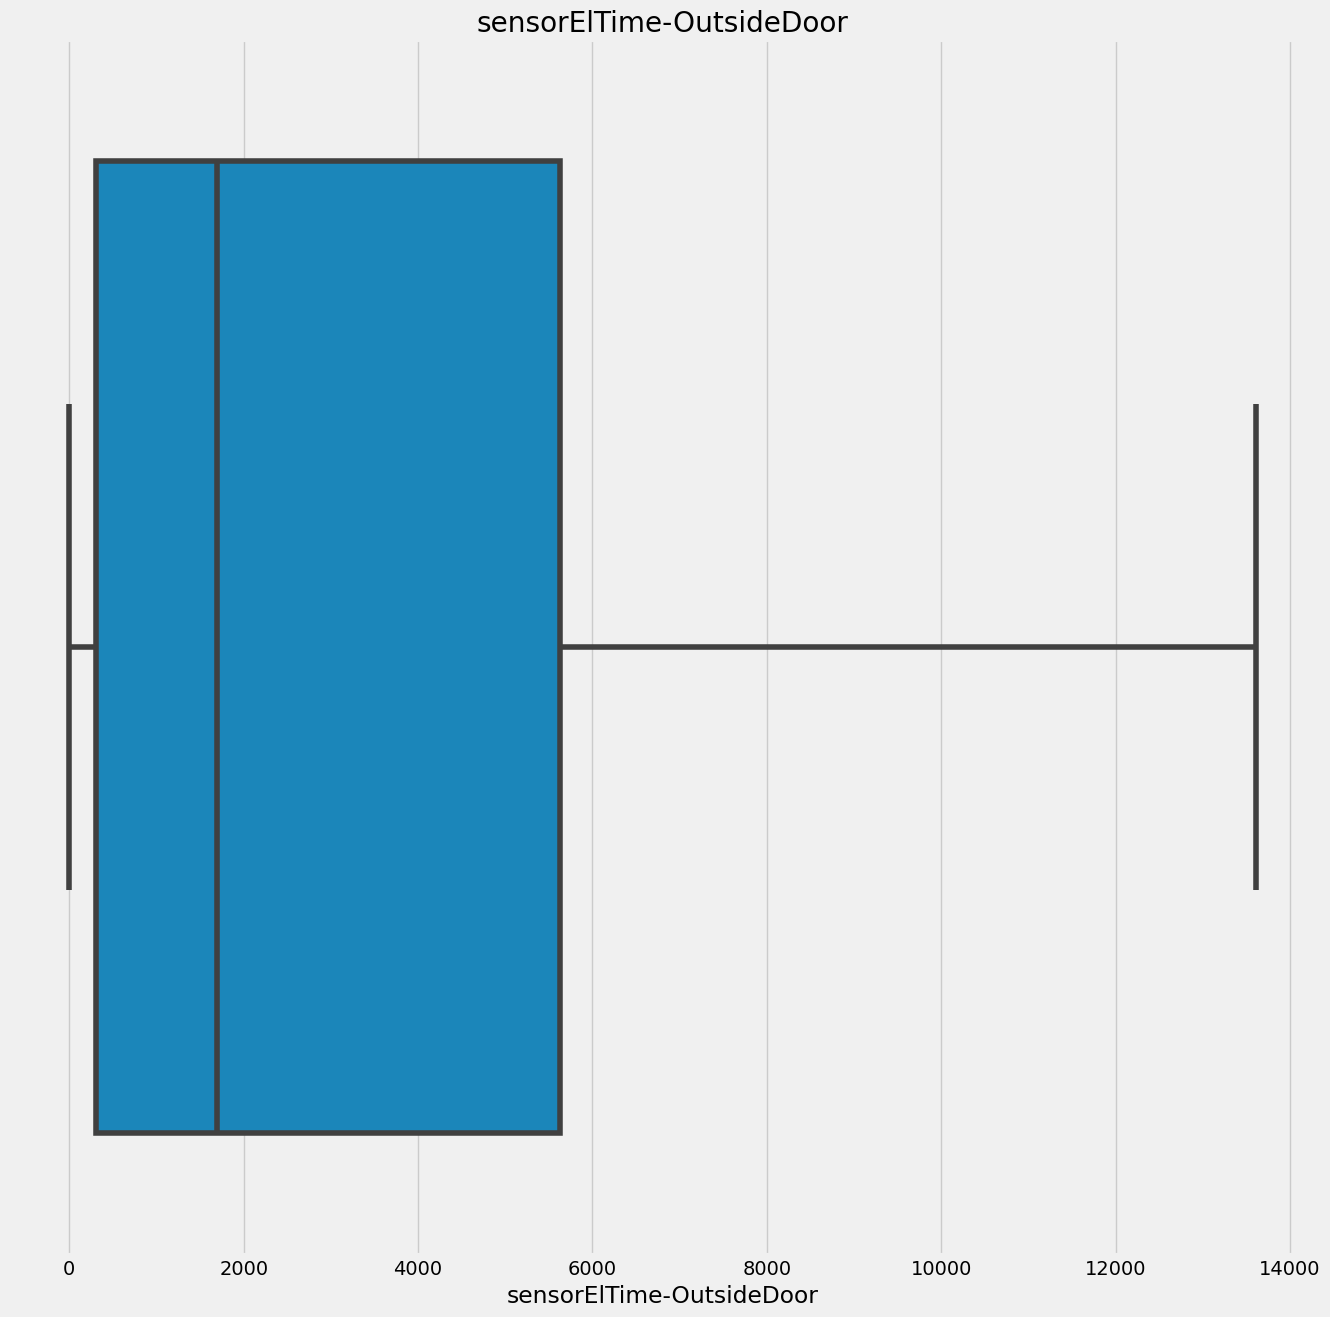

<Figure size 1500x1500 with 0 Axes>

In [39]:
#check for outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [40]:
#remove outliers
def removeoutlier(df,variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_bridge, upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [41]:
for feature in continuous_feature:
    print(feature)
    removeoutlier(df,feature)

lastSensorEventSeconds
-4767.5 99900.5
windowDuration
-506.5 969.5
complexity
0.0368996614451671 1.8636421506243543
activityChange
-0.050822724711590495 1.0937135501949933
sensorCount-Bedroom
-3.495 5.825
sensorCount-Ignore
-5.83 25.21
sensorCount-Kitchen
-4.605 7.675000000000001
sensorCount-LivingRoom
-23.16 38.6
sensorElTime-Bathroom
-8131.393632 13718.781132
sensorElTime-Bedroom
-7945.580967250001 13387.93074275
sensorElTime-DiningRoom
-9554.362389000002 16799.654883000003
sensorElTime-Ignore
-20.52911025 34.215183749999994
sensorElTime-Kitchen
-7751.09870675 13034.24958725
sensorElTime-LivingRoom
-925.430197 1545.900607
sensorElTime-OutsideDoor
-7672.1652779999995 13606.915377999998


C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-p

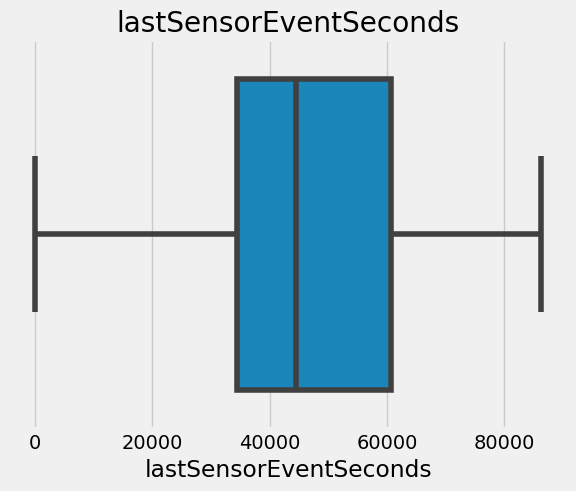

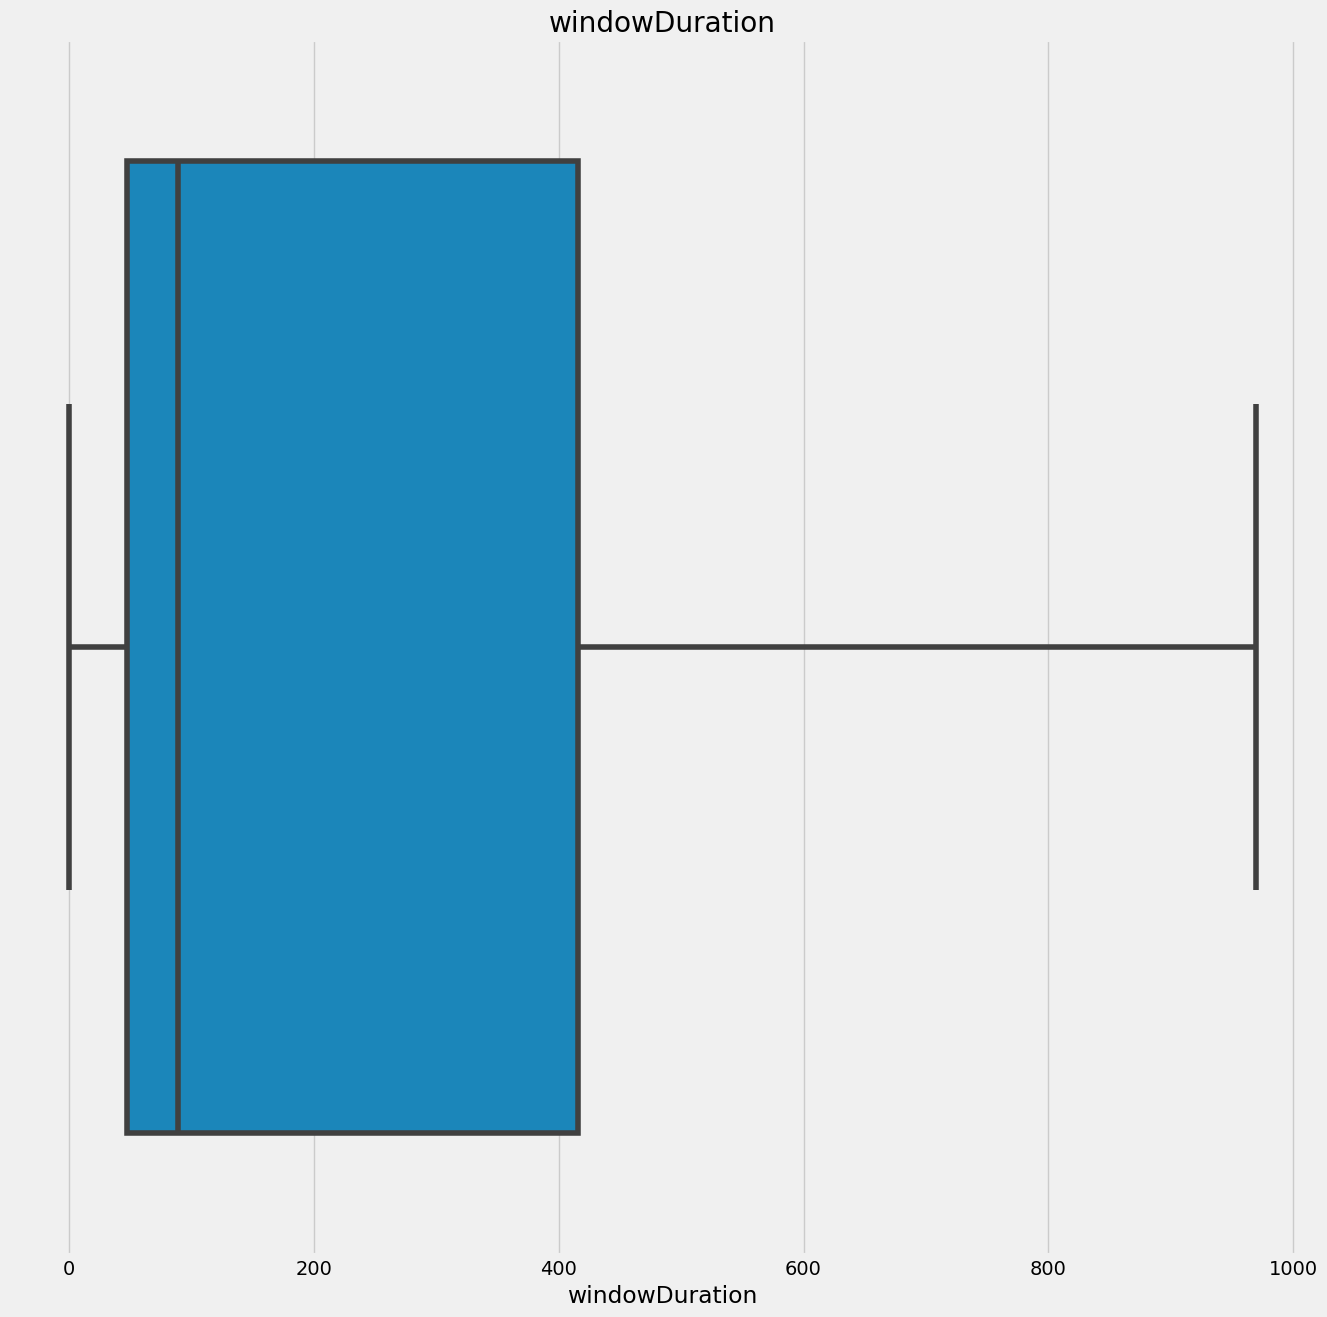

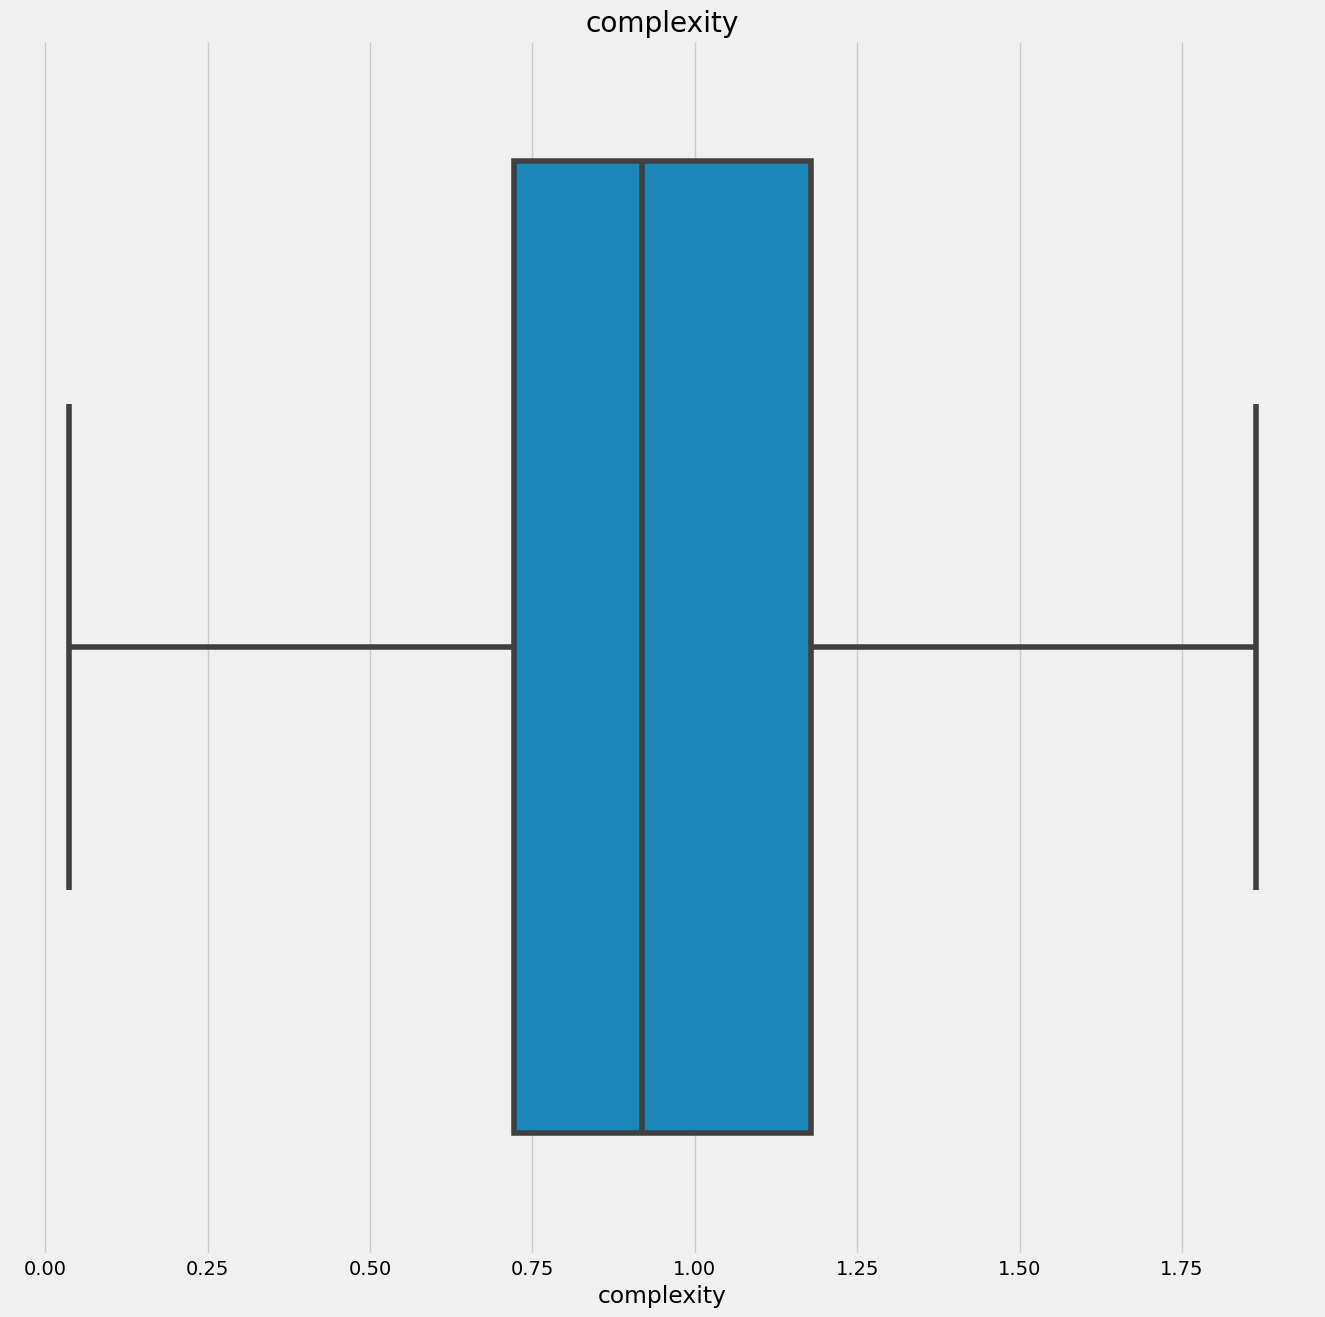

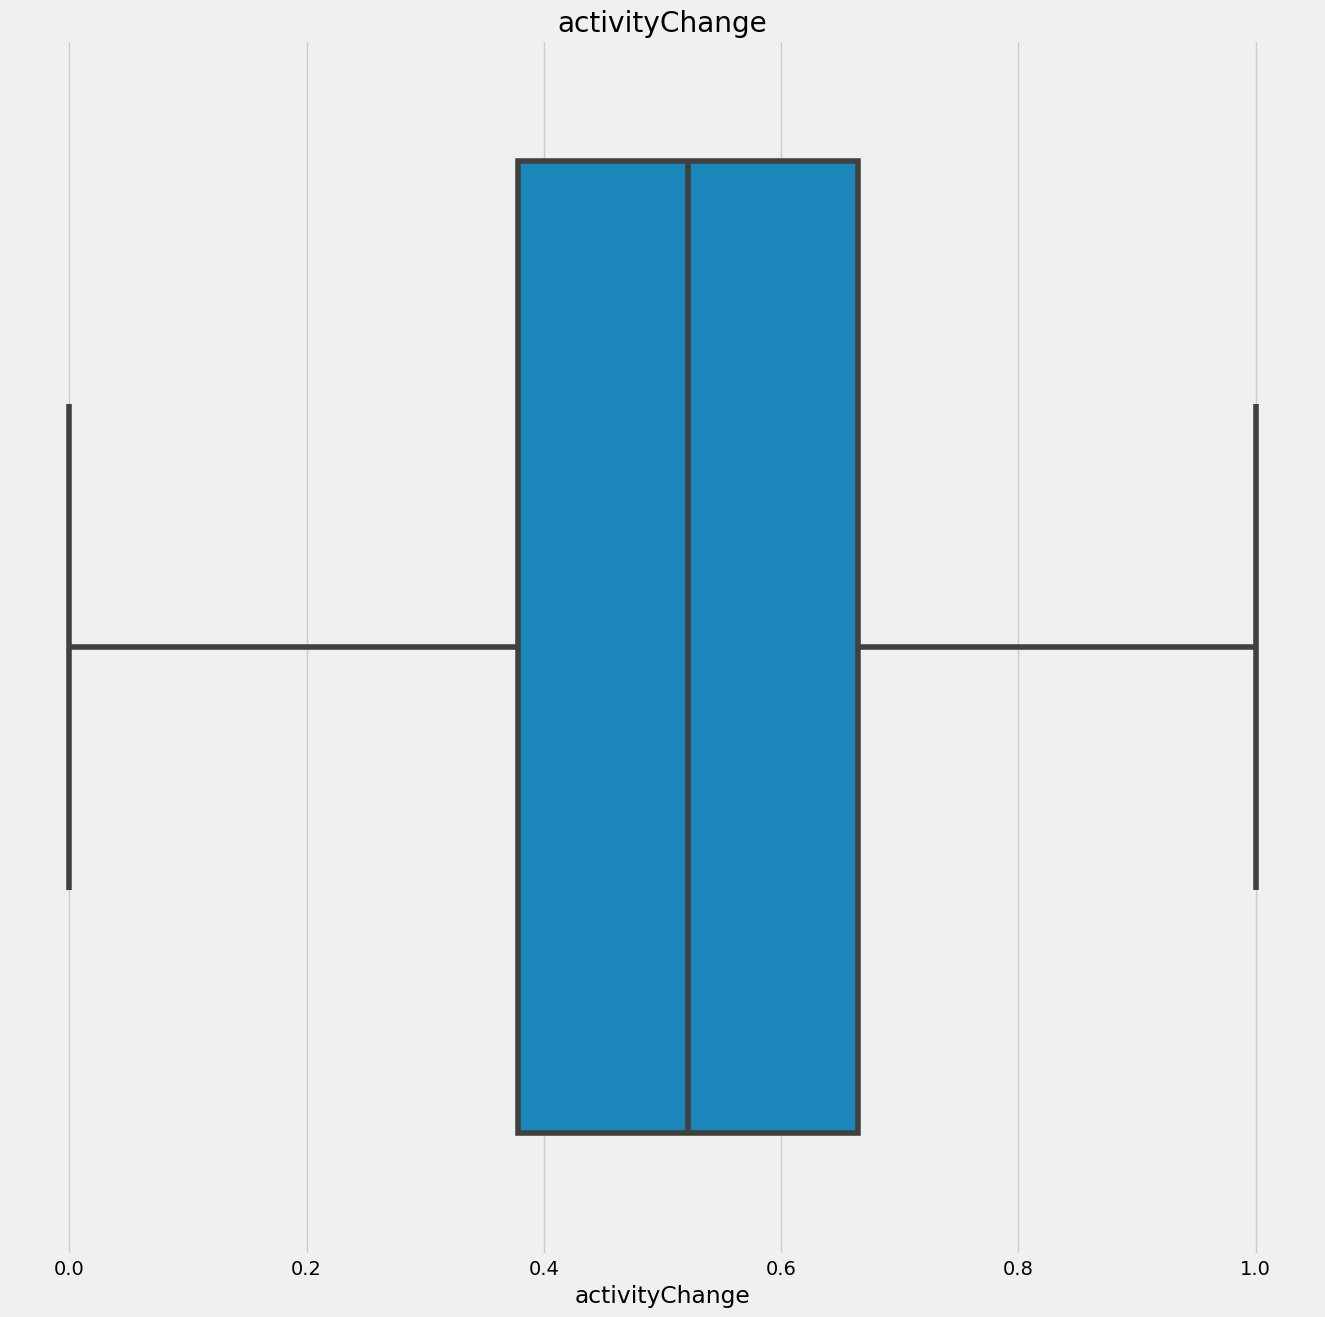

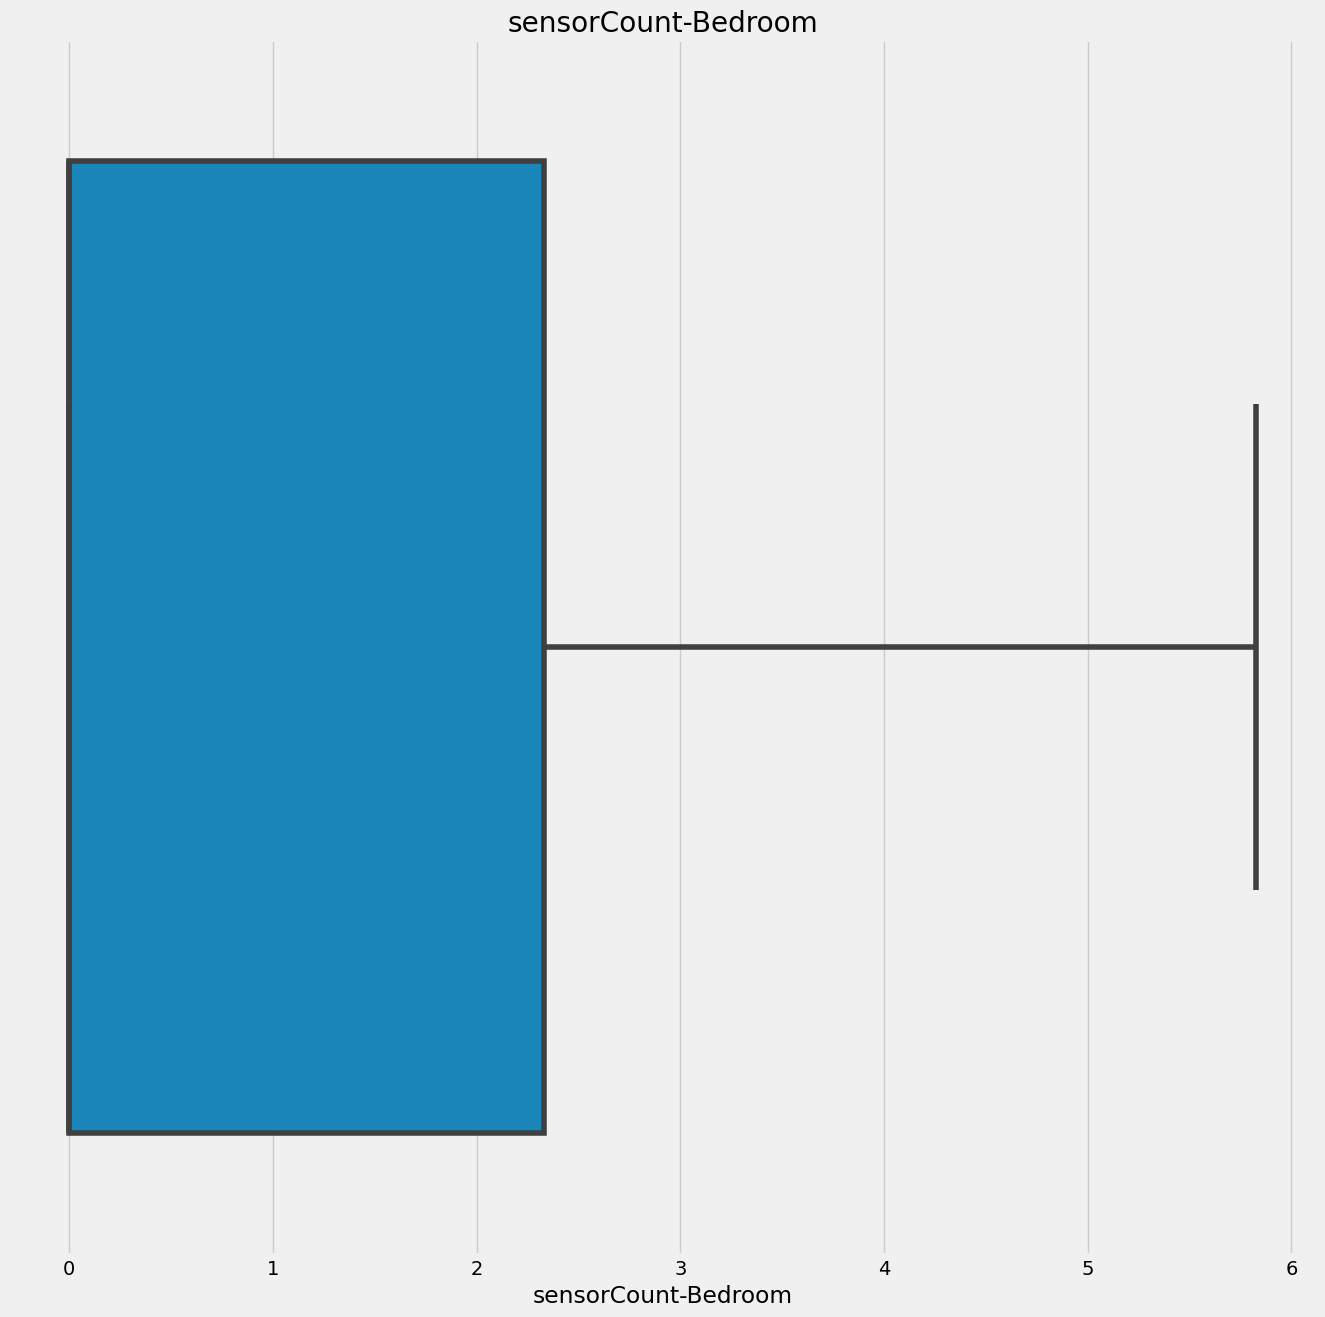

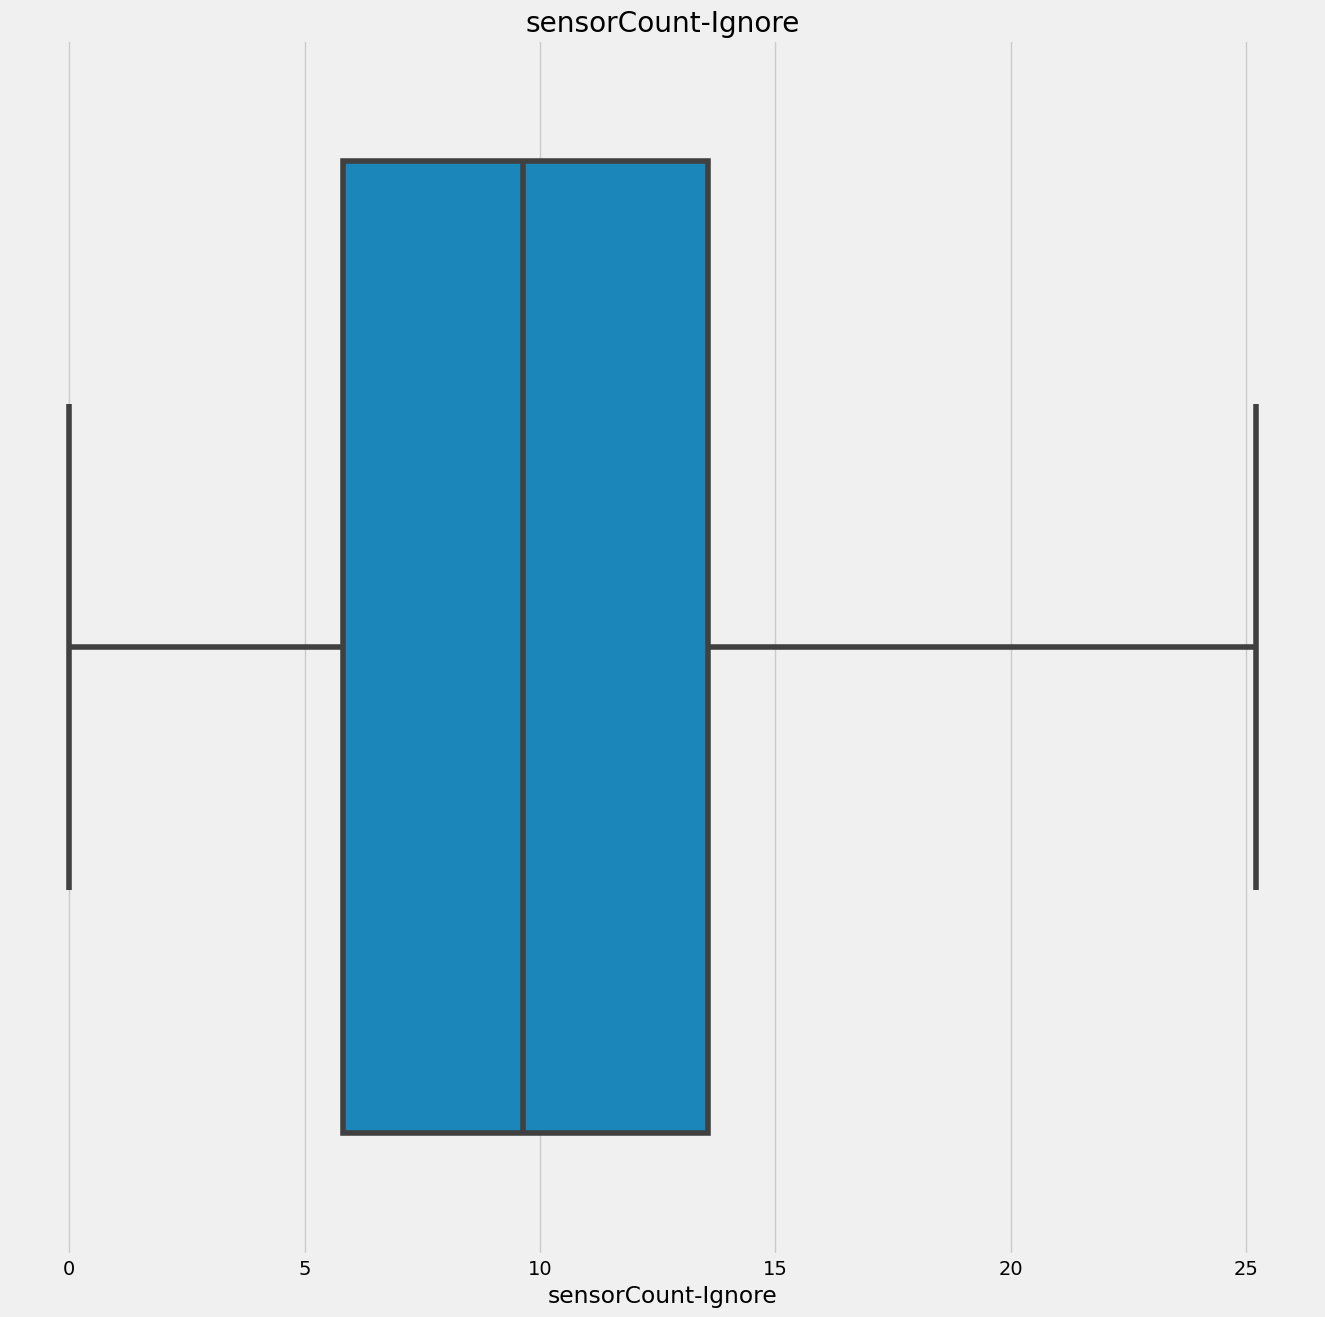

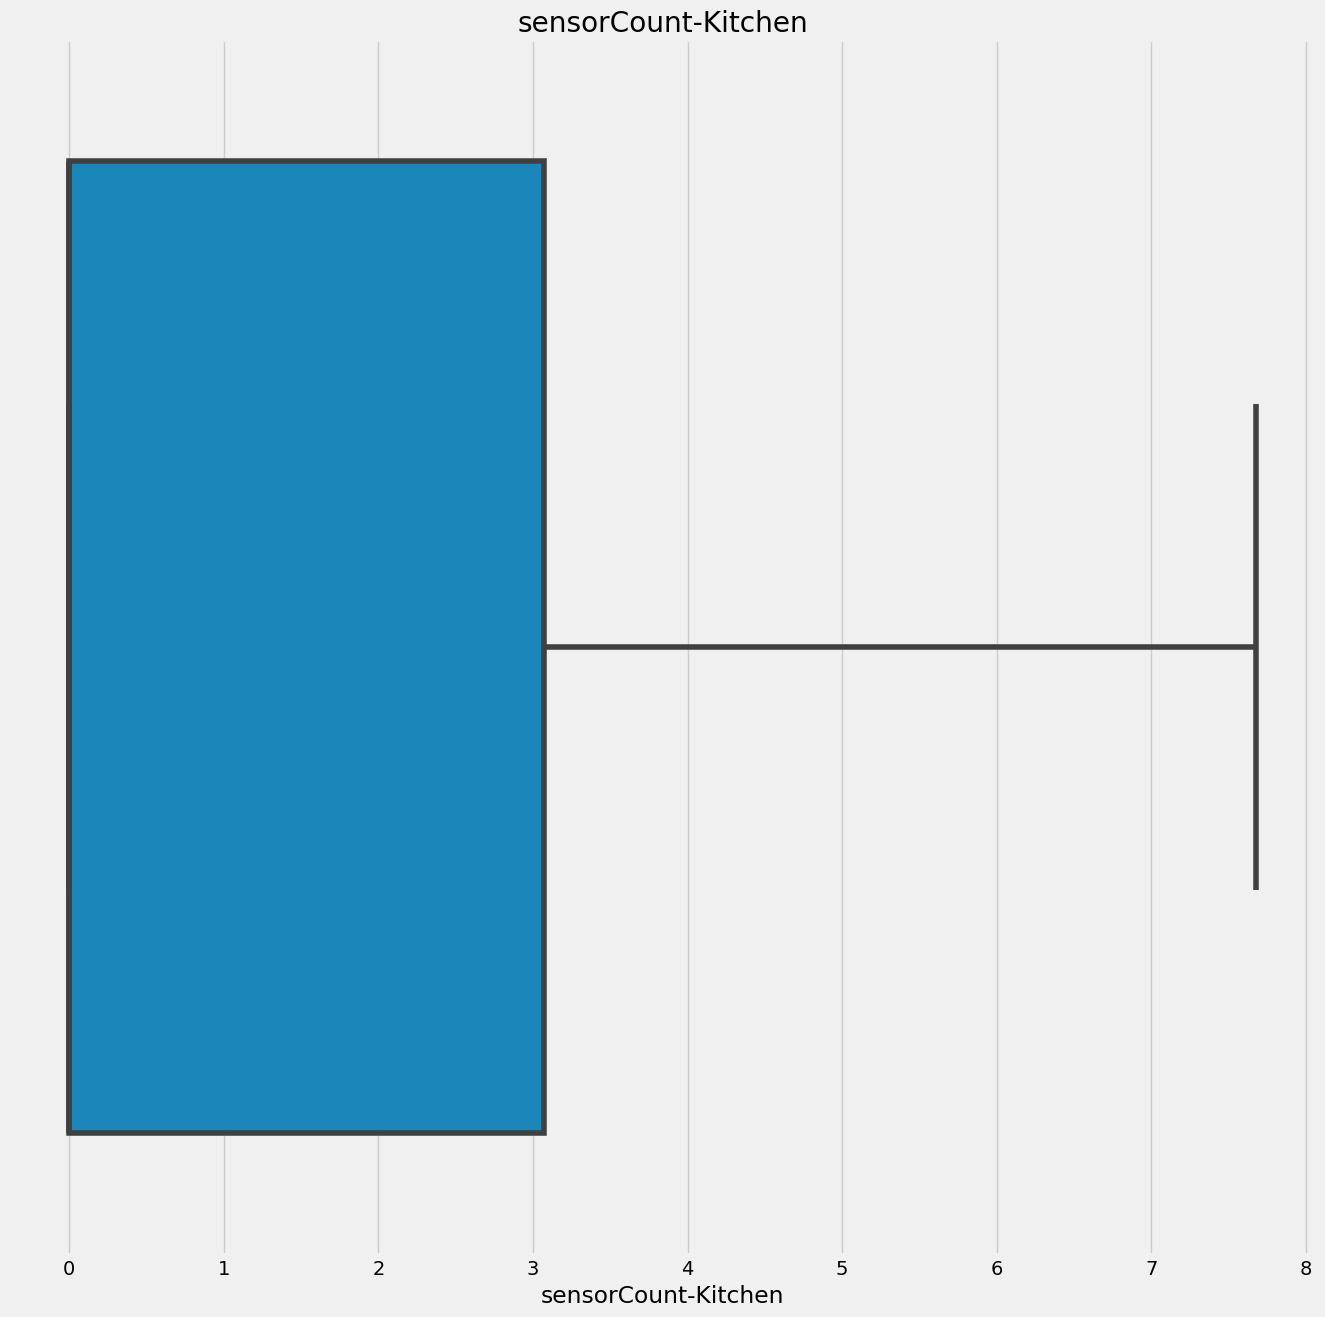

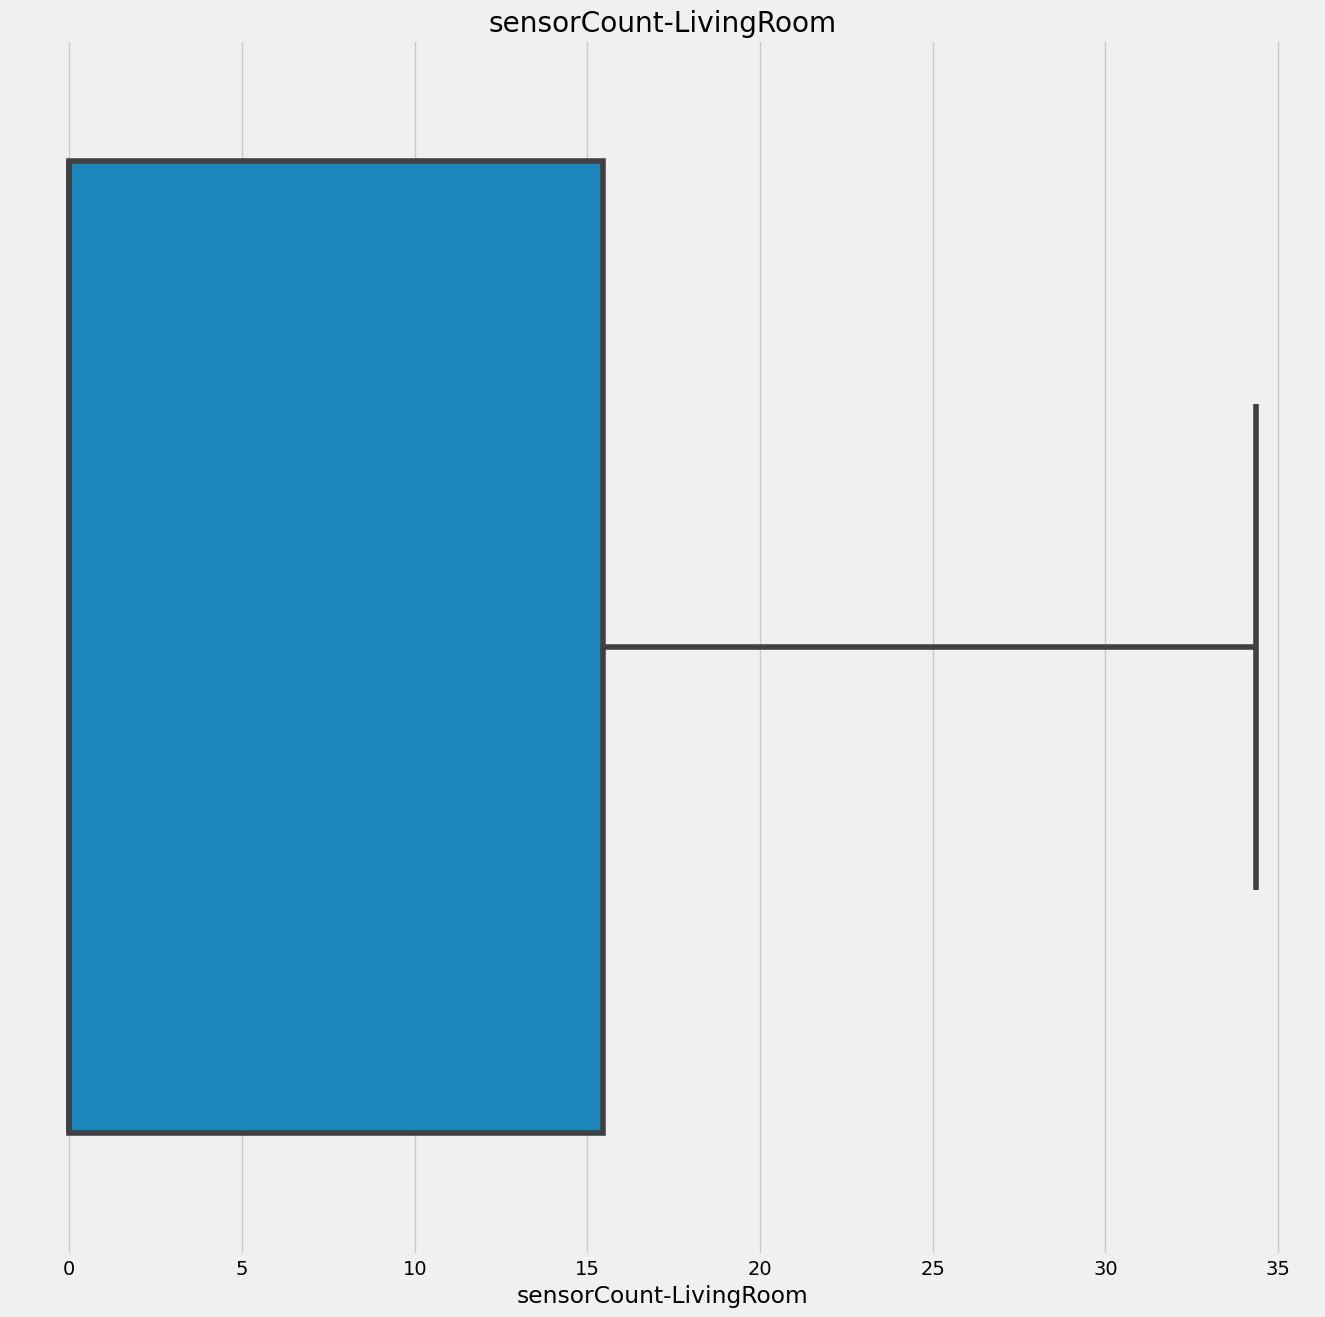

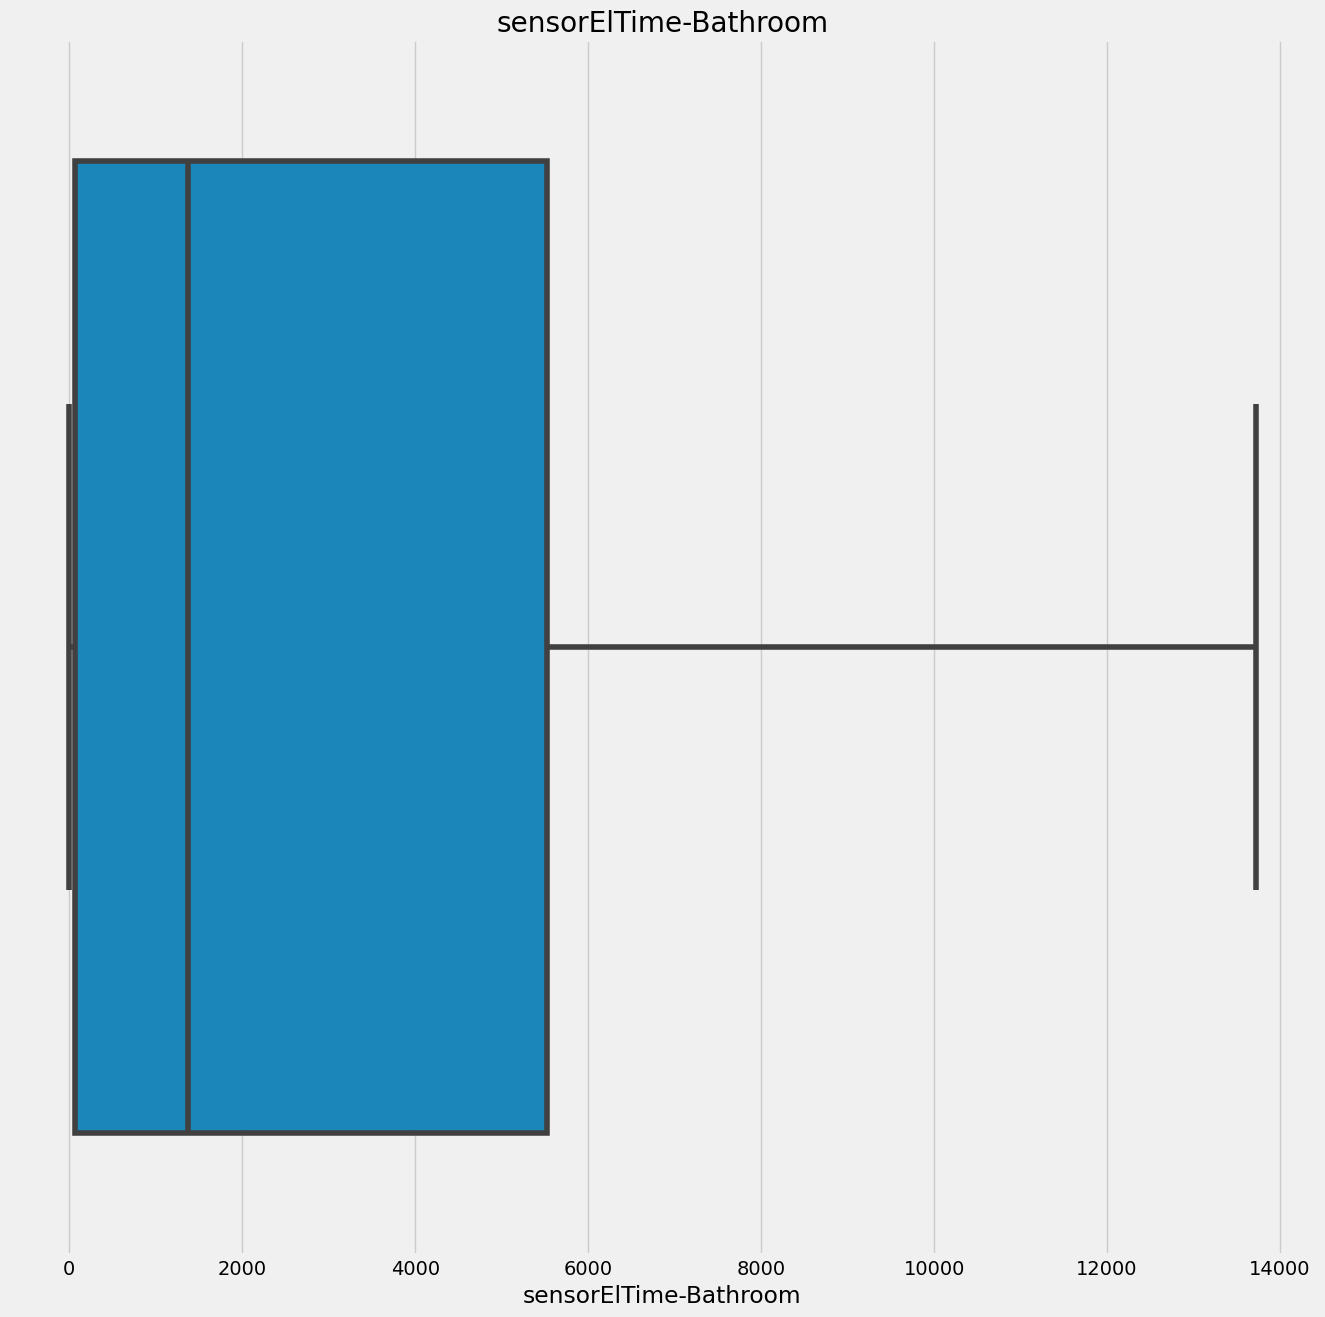

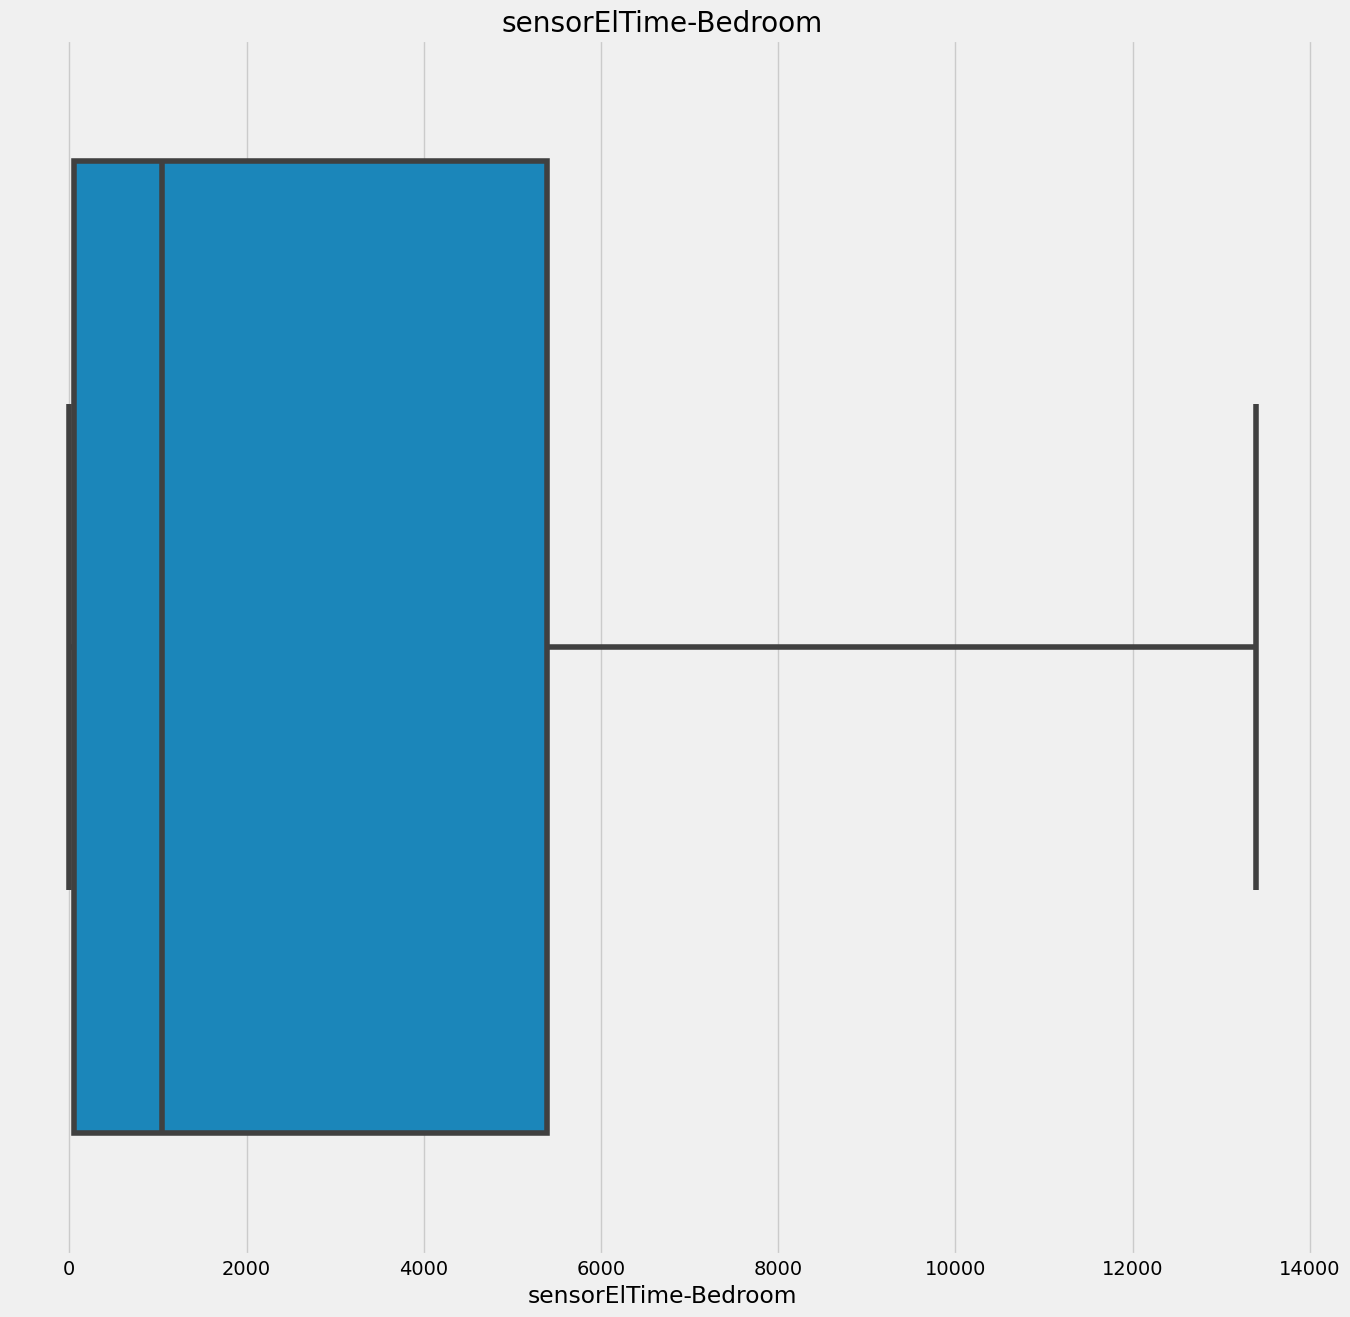

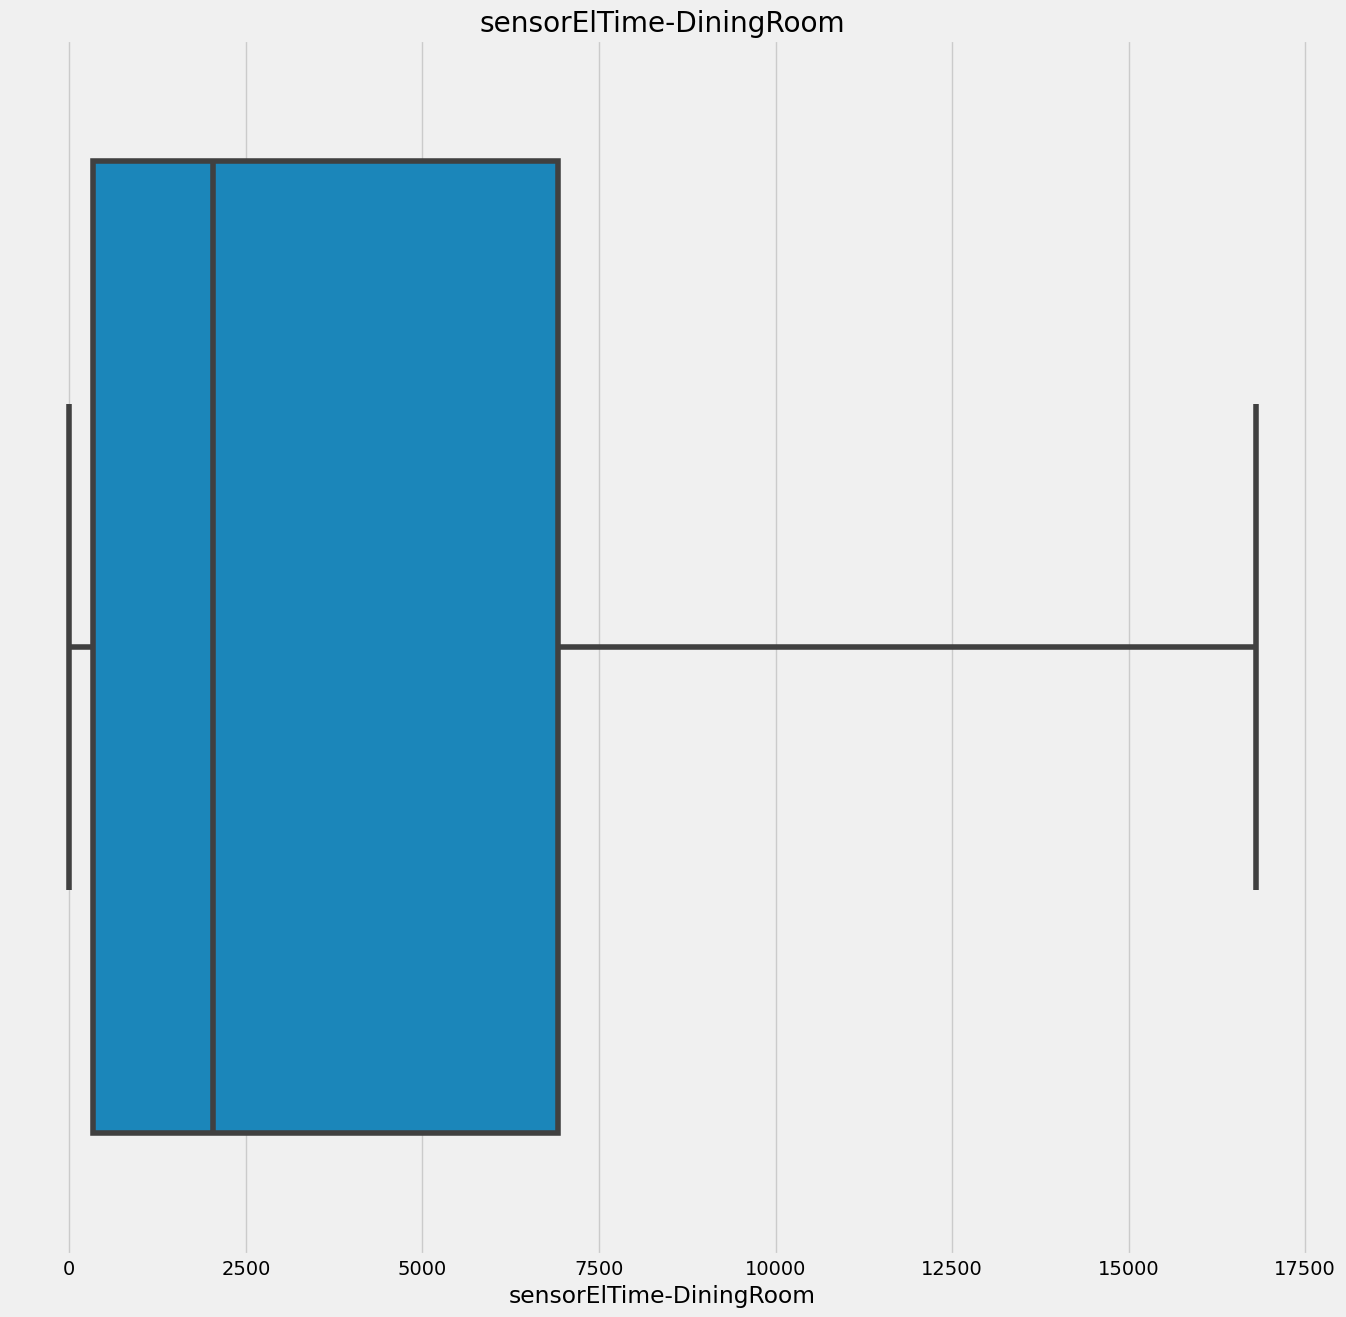

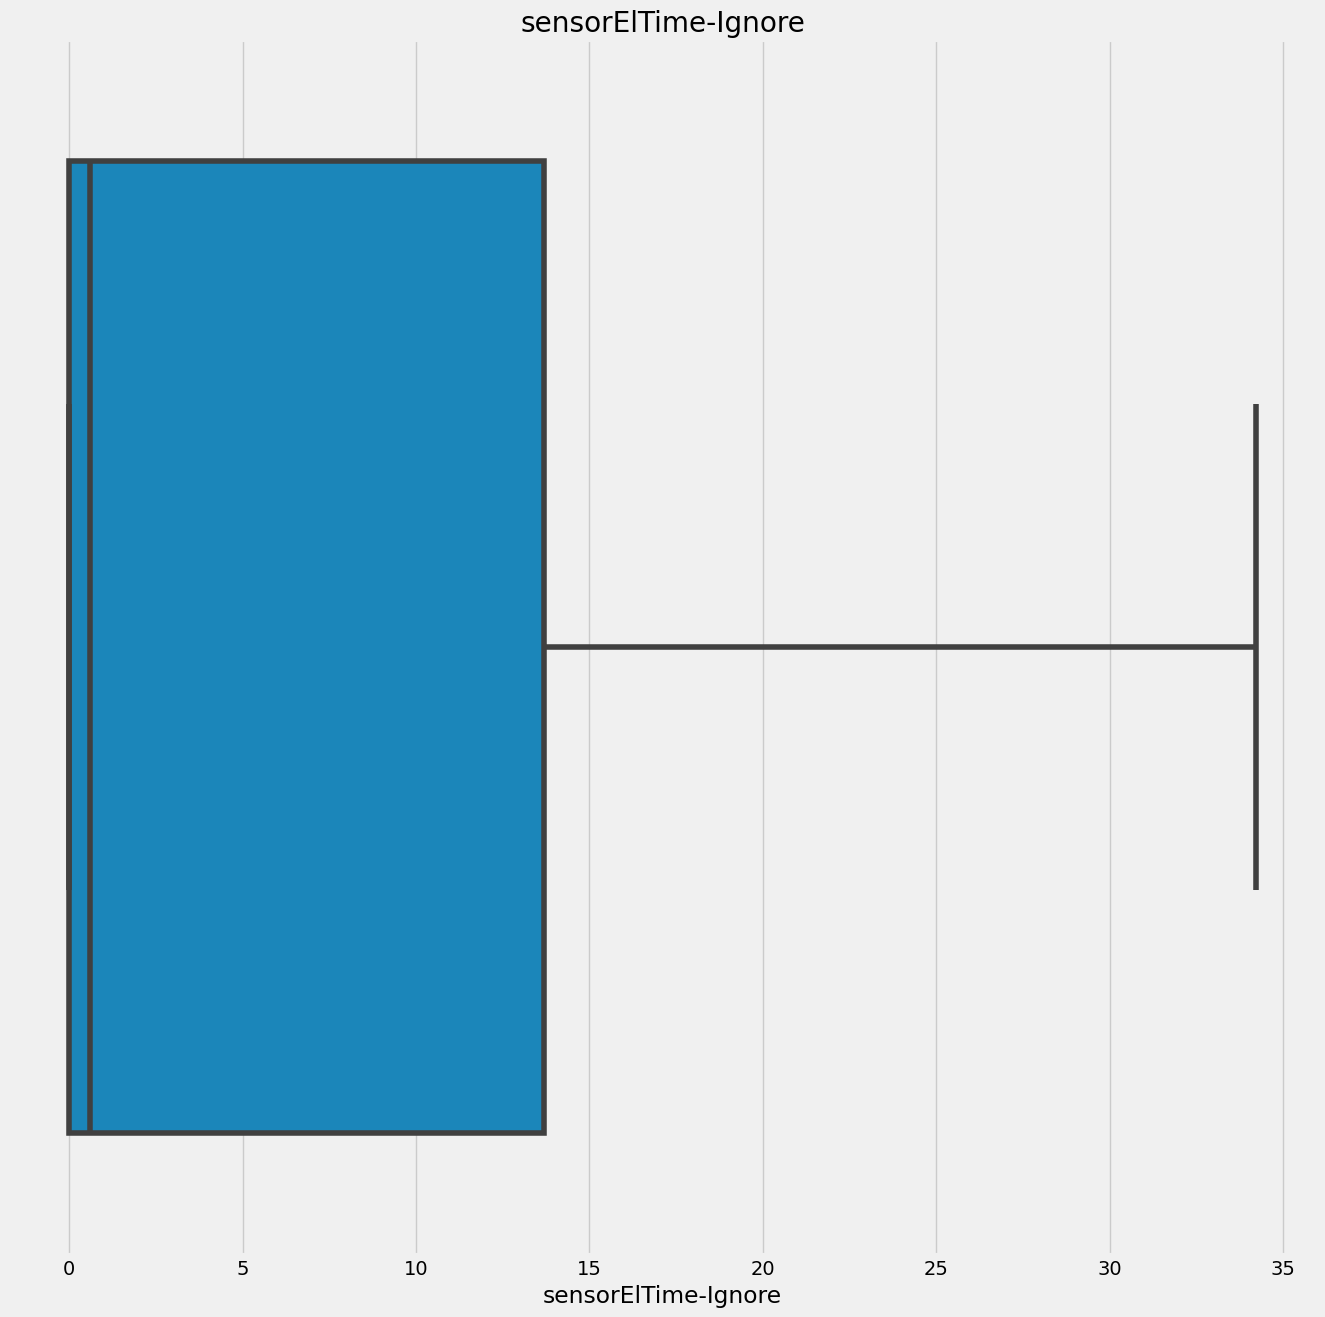

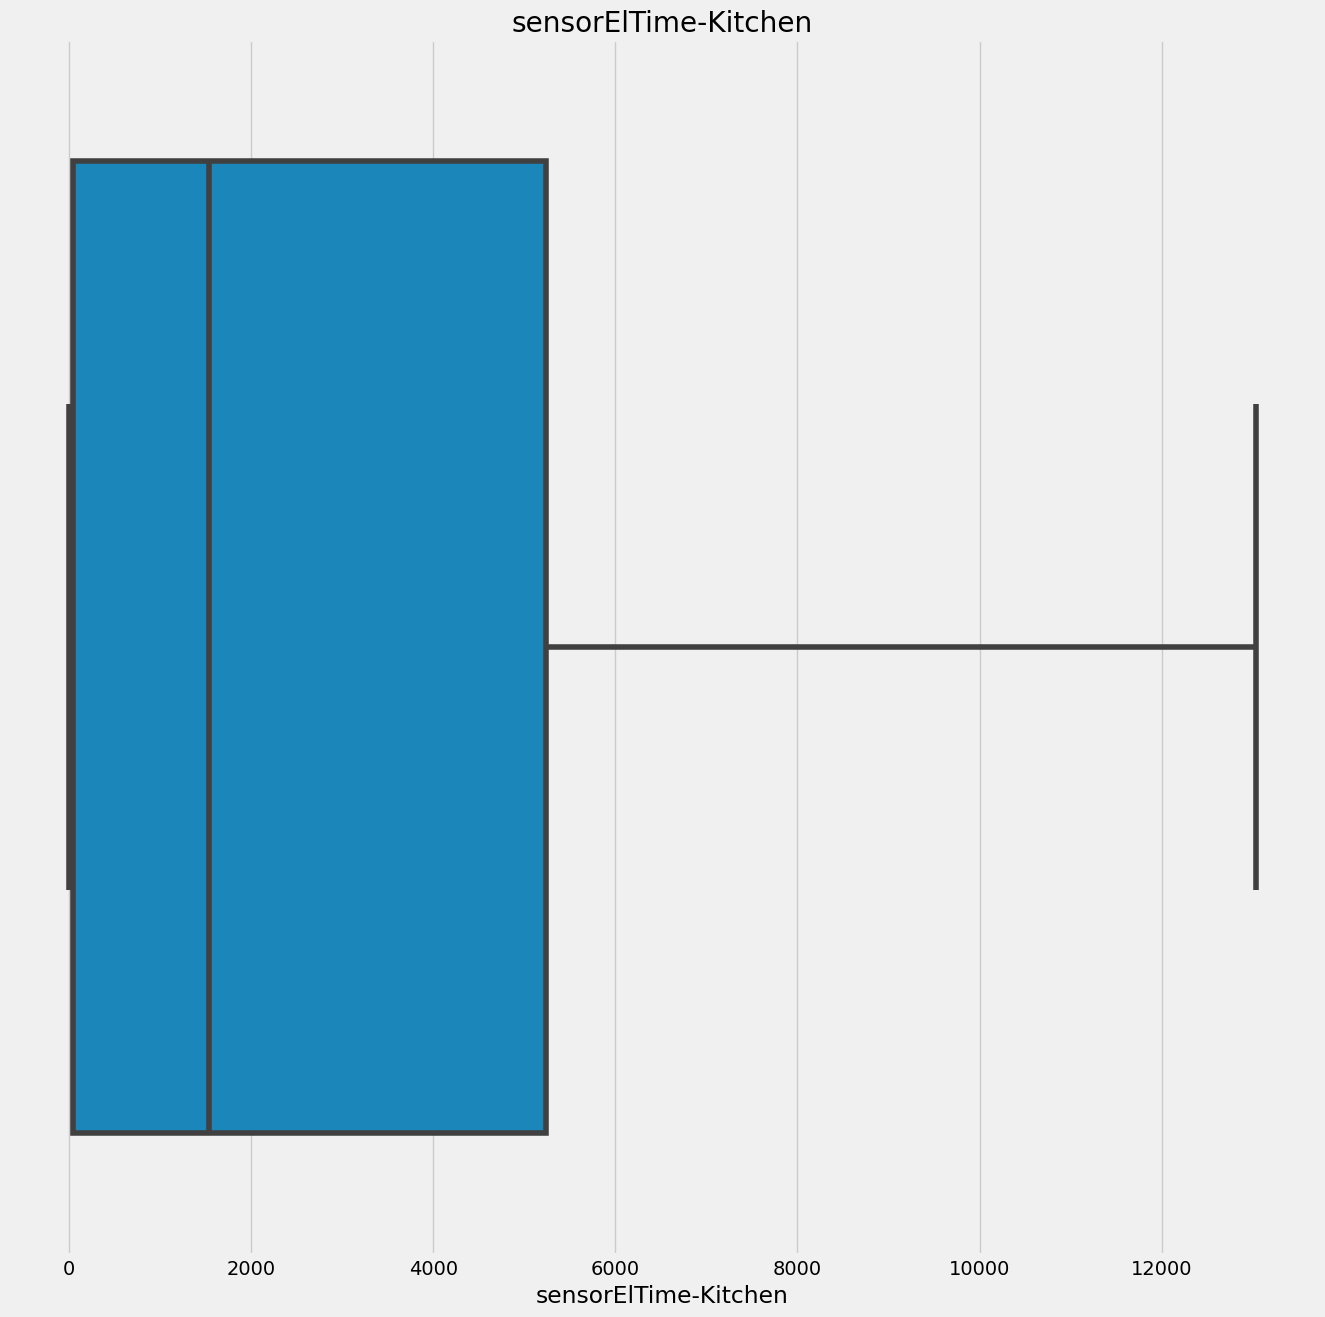

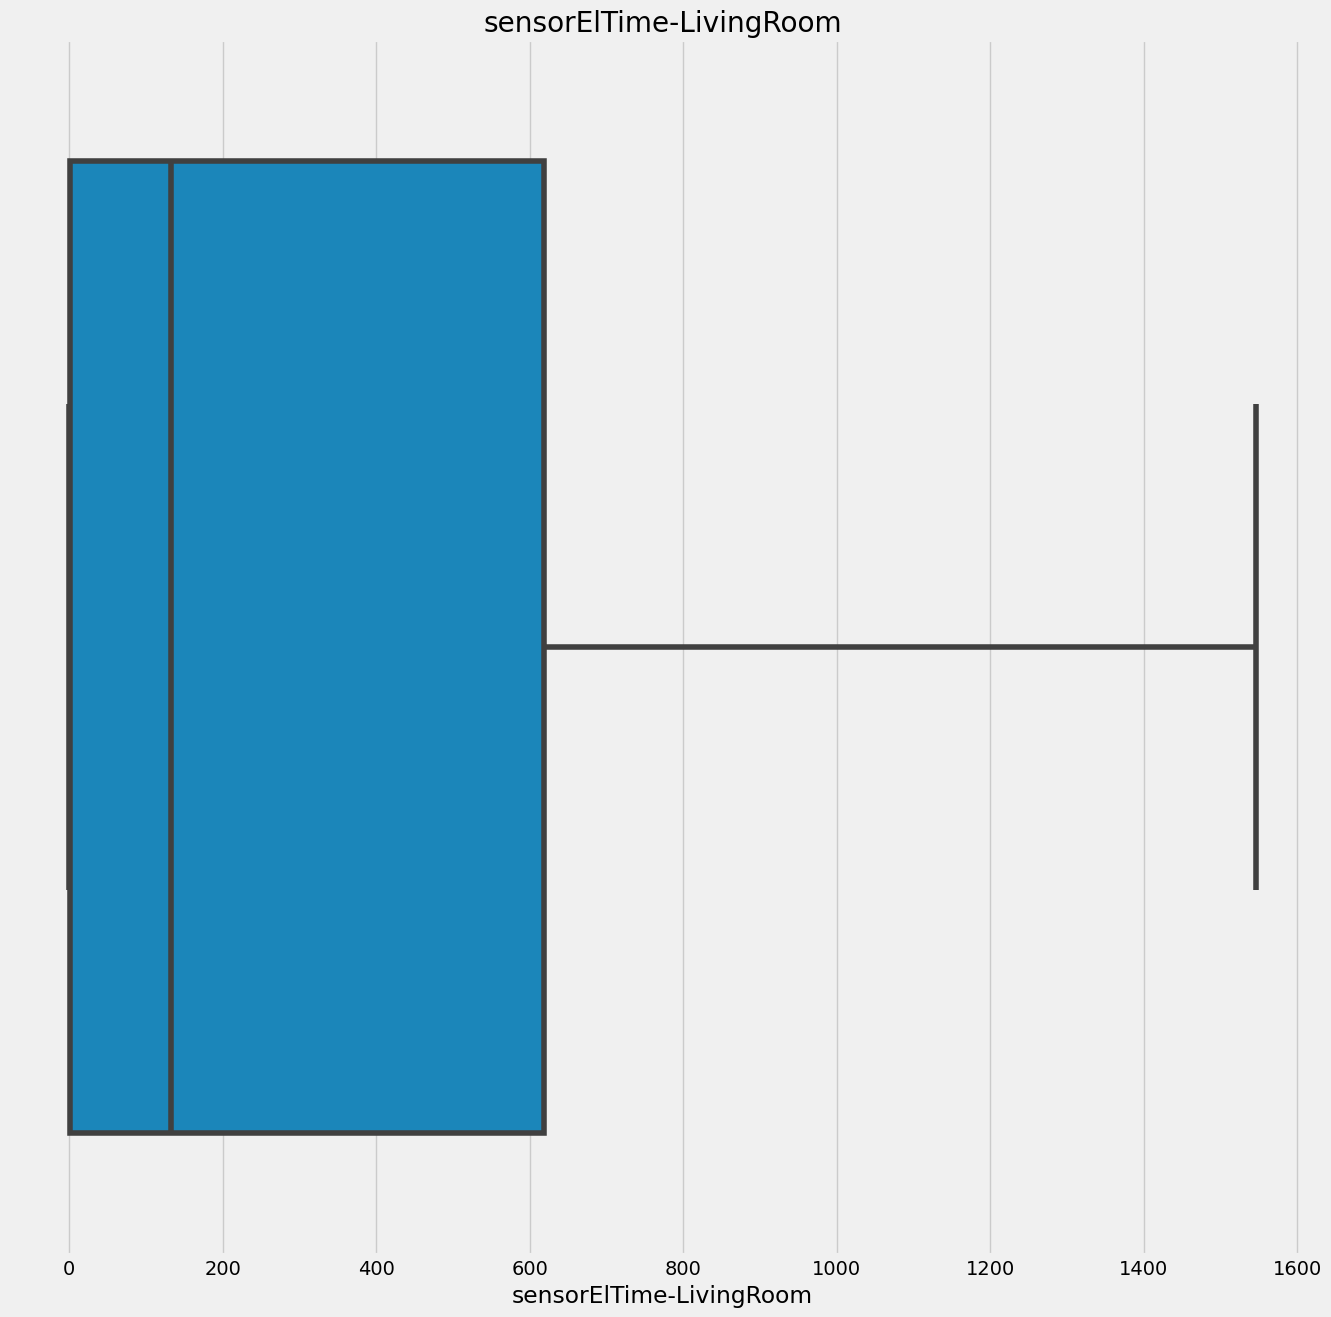

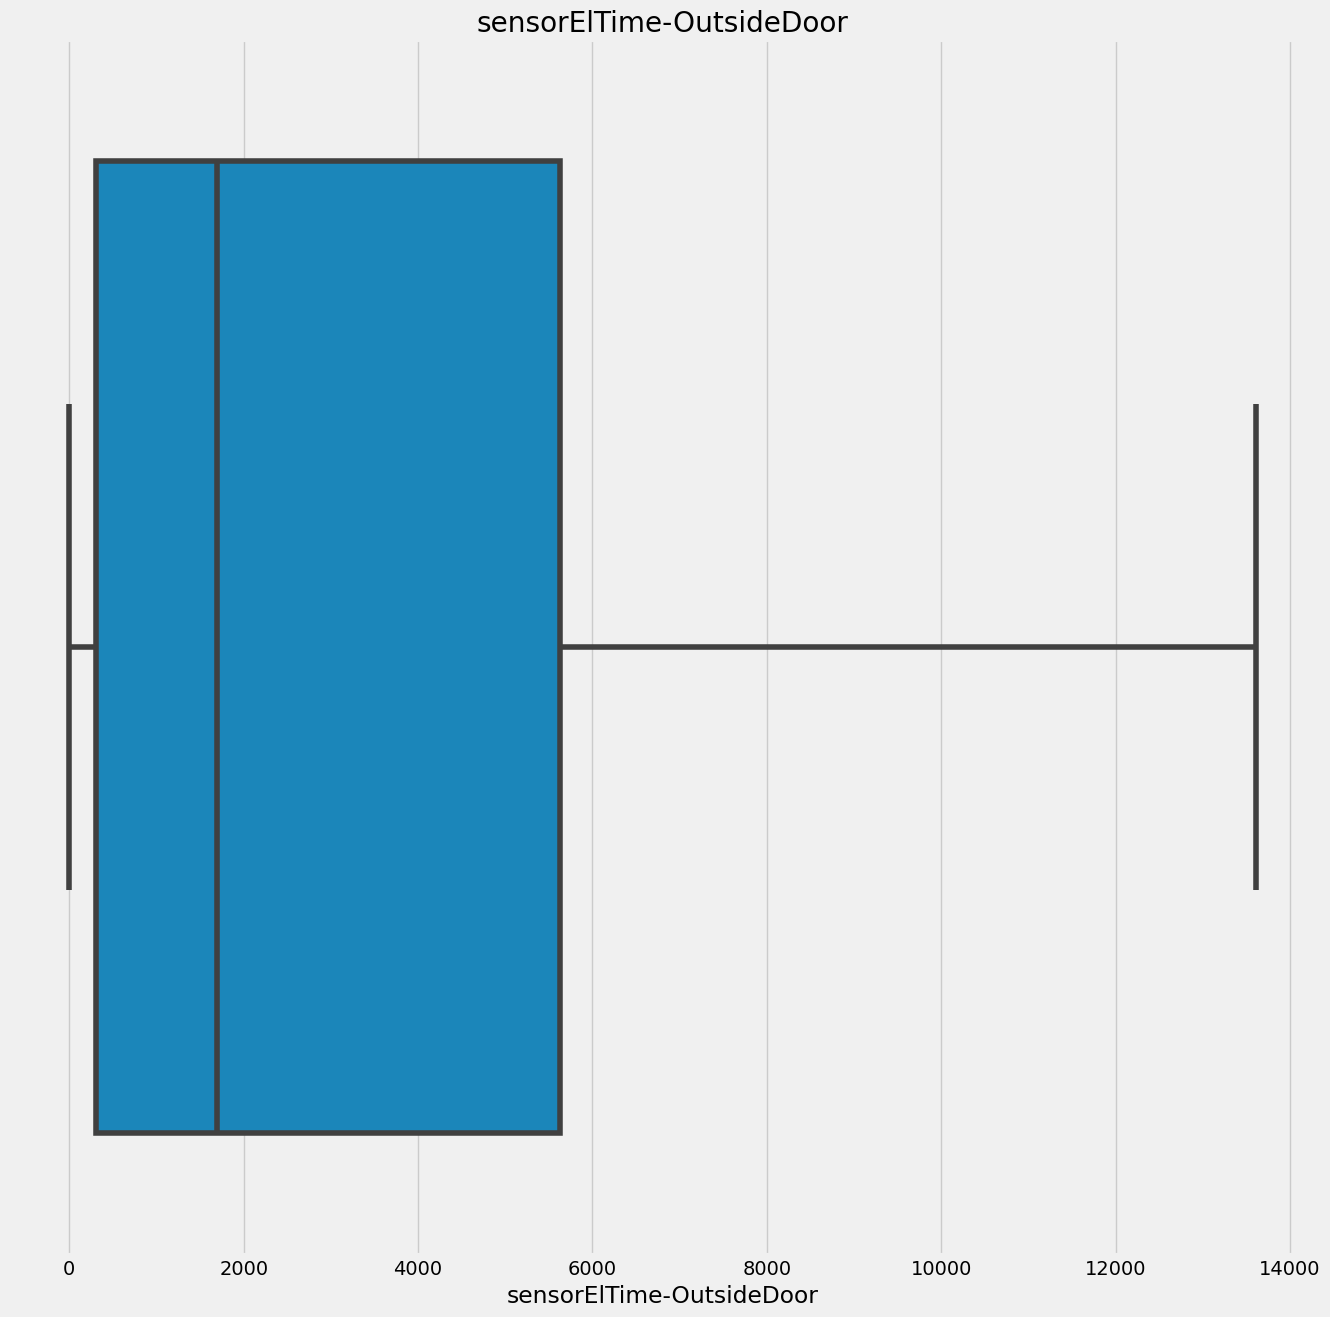

<Figure size 1500x1500 with 0 Axes>

In [42]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

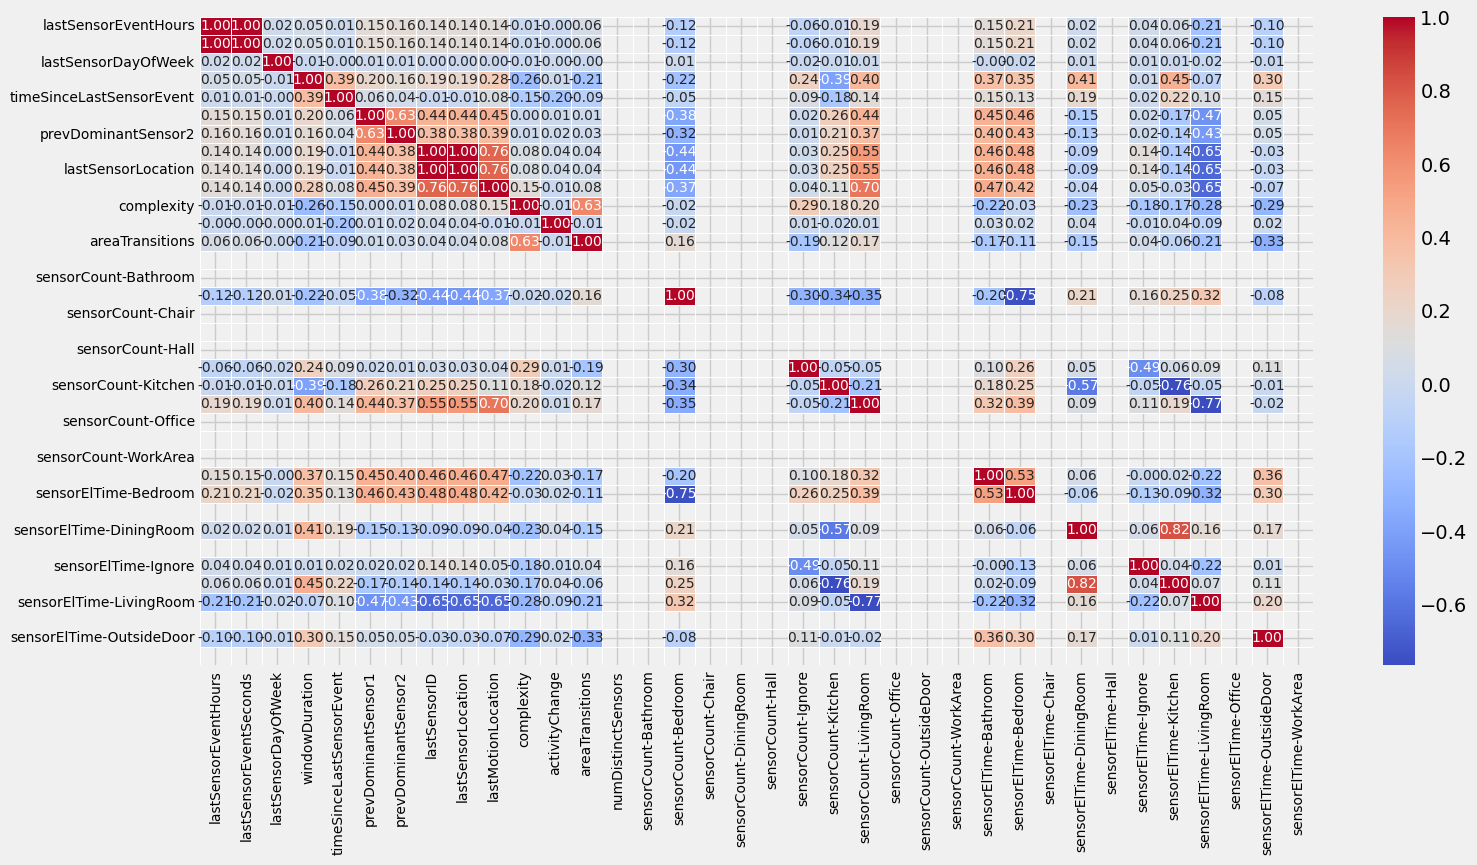

In [46]:
corr_matrix =  df.iloc[:, :-1].corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [47]:
X = df.drop(["activity"], axis=1)
y = df["activity"]
X

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,12.0,46486.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,9.0,...,0.241589,86400.0,16799.654883,86400.0,0.000000,0.424354,0.330546,86400.0,0.023716,86400.0
1,12.0,46486.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,9.0,...,0.262791,86400.0,16799.654883,86400.0,0.000000,0.445556,0.351748,86400.0,0.044918,86400.0
2,12.0,46486.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,9.0,...,0.307291,86400.0,16799.654883,86400.0,0.000000,0.490056,0.396248,86400.0,0.089418,86400.0
3,12.0,46486.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,9.0,...,0.328526,86400.0,16799.654883,86400.0,0.000000,0.511291,0.417483,86400.0,0.110653,86400.0
4,12.0,46486.0,2.0,1.0,0.0,0.0,0.0,5.0,5.0,9.0,...,0.349267,86400.0,16799.654883,86400.0,0.000000,0.532032,0.438224,86400.0,0.131394,86400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875222,11.0,42936.0,3.0,834.0,0.0,6.0,6.0,7.0,7.0,7.0,...,8006.733422,86400.0,879.095031,86400.0,0.093234,883.482338,0.000000,86400.0,1909.591334,86400.0
1875223,11.0,43012.0,3.0,910.0,10.0,6.0,6.0,5.0,5.0,7.0,...,8082.277739,86400.0,954.639348,86400.0,0.000000,959.026655,75.544317,86400.0,1985.135651,86400.0
1875224,12.0,43241.0,3.0,969.5,10.0,6.0,6.0,5.0,5.0,7.0,...,8312.228409,86400.0,1184.590018,86400.0,0.000000,1188.977325,305.494987,86400.0,2215.086321,86400.0
1875225,12.0,43246.0,3.0,969.5,5.0,6.0,6.0,5.0,5.0,7.0,...,8316.274501,86400.0,1188.636110,86400.0,0.000000,1193.023417,309.541079,86400.0,2219.132413,86400.0


In [48]:
y

0          <NA>
1          <NA>
2          <NA>
3          <NA>
4          <NA>
           ... 
1875222    <NA>
1875223    <NA>
1875224    <NA>
1875225    <NA>
1875226    <NA>
Name: activity, Length: 1875227, dtype: object